# PHAS0020 - Final Python Task: "PSF or Aperture Photometry"
### Image combination, Point-Spread-Functions, Flux Calibration and stellar temperatures
_Author: g.savini@ucl.ac.uk     (01/02/2022)_

<div class="alert alert-success"> 

**Assessment details**

The assessment details can be found on the <em><b> Final_Task_2022.pdf</b></em> file on Moodle. Each task step is detailed and accompanied by relevant quantitative marks. As a project, this task will put to good use the various things you have learnt in the first 5 sessions (which also implies you have a readily available template for many procedures needed). 

<u>This piece of work is the largest component to this module and is worth 30%. As such do not approach this like a standard script, but more like a lab formal report.</u>

**Summative Assessment**

In this task you will test the use of all the scripts, tools and techniques you made use of in the last 5 sessions.
These include but are not limited to:
<ul>
<li> Input/output of images; </li>
<li> Manipulation of images as arrays of numbers </li>
<li> Making use of histograms for rapresentation but also as a means to compare distributions </li>
<li> Use the gaussian distribution statistical package to fit gaussians; </li>
<li> Extract statistical parameters from images and use them for the purpose of comparison and analysis; </li>
<li> Characterizing the psf from 2d fitting; </li>
<li> Comparison of photometry findings between aperture photometry and psf photometry; </li>
<li> Flux calibration and stellar temperature retrieval; </li>
</ul>

**Formative Assessment**

As part of this task, you might need to go back and review some of the thing you've already seen in previous sessions as
well as using these same tools in slightly different ways also exploring additional functionalities or keywords of the same python commands or functions.

**Rules of Submission**

Please read carefully the rules of submission of this Final Python task 
on the Moodle tab as they are of paramount importance to make sure your submission satisfies all points.

Also, similarly to all other sessions, there will be marks allocated on the basis of good code commenting and code practice 
as well as detailed text cells explaining your rationale on the code cells written.
Remember, the text cells need to summarize this task as a report (including any formulas, equations or images that you think might be necessary.

**Task details**

The details of the task are explained in a separate short pdf on the same moodle tab as this python file.
Here below there will be a few pre-prepared cells that introduce to some manipulation that you might or might not have seen previously in order to get things started.

#### Follow the instructions on the Moodle tab and rename this notebook with your student number; when you have completed the task you will upload this notebook to Moodle, and press the Submit button when happy.

If there are any functional issues, please <a href="mailto:g.savini@ucl.ac.uk">let me know</a>. But be advised that similarly to a formal report or ICA, and given that all required content has already been seen, "how to" questions will be referred to previously executed scripts. 
</div>



## Getting started: Importing modules and data

The first thing you'll need to do is import the modules you will need. 
Of course some modules you might need will emerge as you work on things, in which case you can do it then and there.
However, for the sake of being tidy, when reorganizing your scripts, make sure you import all modules at the beginning of the script. And explain for each why and what will it be used for.

Subsequently make sure you load all images that you'll need for this script. 
As mentioned above, all instructions for this task will be contained in the Final-python-task pdf file.

# And so the code begins...

# 1.1  Fits files, stellar coordinates and archives

Checking the header to see if it is Plate-solved.

In [1]:
%matplotlib inline
import astropy
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0) # sets the default size for figures
#
home_dir = os.getcwd()+'/'
print ("The Home Directory is set to:", home_dir) # check the home directory

The Home Directory is set to: C:\Users\safee\Practical Astro Computing\Final Week/


In [2]:
########For B-channel images
test_fileB1 = './B1.fits'
imageB1 = fits.open(test_fileB1)
imageB1.info()
imageB1_head=imageB1[0].header
imageB1_head

Filename: ./B1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:32:00' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:32:00' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:25:00' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [3]:
test_fileB2 = './B2.fits'
imageB2 = fits.open(test_fileB2)
imageB2.info()
imageB2_head=imageB2[0].header
imageB2_head

Filename: ./B2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:31:58' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:58' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:28:26' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [4]:
test_fileB3 = './B3.fits'
imageB3 = fits.open(test_fileB3)
imageB3.info()
imageB3_head=imageB3[0].header
imageB3_head

Filename: ./B3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:31:59' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:59' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:59:21' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [5]:
#######For V-channel images
test_fileV0 = './V0.fits'
imageV0 = fits.open(test_fileV0)
imageV0.info()
imageV0_head=imageV0[0].header
imageV0_head

Filename: ./V0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T21:28:41' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T21:28:41' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T19:09:21' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [6]:
test_fileV1 = './V1.fits'
imageV1 = fits.open(test_fileV0)
imageV1.info()
imageV1_head=imageV1[0].header
imageV1_head

Filename: ./V0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T21:28:41' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T21:28:41' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T19:09:21' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [7]:
test_fileV2 = './V2.fits'
imageV2 = fits.open(test_fileV2)
imageV2.info()
imageV2_head=imageV2[0].header
imageV2_head

Filename: ./V2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:32:00' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:59' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:35:20' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [8]:
test_fileV3 = './V3.fits'
imageV3 = fits.open(test_fileV3)
imageV3.info()
imageV3_head=imageV3[0].header
imageV3_head

Filename: ./V3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:32:00' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:32:00' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T19:06:04' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [9]:
#######For r-channel images
test_filer1 = './r1.fits'
imager1 = fits.open(test_filer1)
imager1.info()
imager1_head=imager1[0].header
imager1_head

Filename: ./r1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:31:59' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:59' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:38:47' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [10]:
test_filer2 = './r2.fits'
imager2 = fits.open(test_filer2)
imager2.info()
imager2_head=imager2[0].header
imager2_head

Filename: ./r2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:31:58' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:58' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:42:15' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

In [11]:
test_filer3 = './r3.fits'
imager3 = fits.open(test_filer3)
imager3.info()
imager3_head=imager3[0].header
imager3_head

Filename: ./r3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (1528, 1528)   float32   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1528 / Axis length                                    
NAXIS2  =                 1528 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-03-01T19:31:58' / Date FITS file was generated                  
IRAF-TLM= '2022-03-01T19:31:58' / Time of last modification                     
OBJECT  = 'IC__342 '           / Name of the object observed                    
DATE-OBS= '2022-01-27T18:42:15' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.80000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   1.80000000000E+0

After checking throigh each image, it can be concluded that the images are plate-solved.

# 2.1 Identifying frames with which to work

Now let's visually check the images.

In [12]:
####Define quick look function to plot the fits file#### 
def quicklookup(input_image):
    '''Takes data from a fits image and displays the image with a good viewing range (mean ± stdev)'''
    
    Mean = np.mean(input_image)
    Stdev = np.std(input_image)
    
    plt.imshow(input_image, cmap='twilight', vmin = Mean - 2*Stdev, vmax = Mean + 2*Stdev)

For B-channel

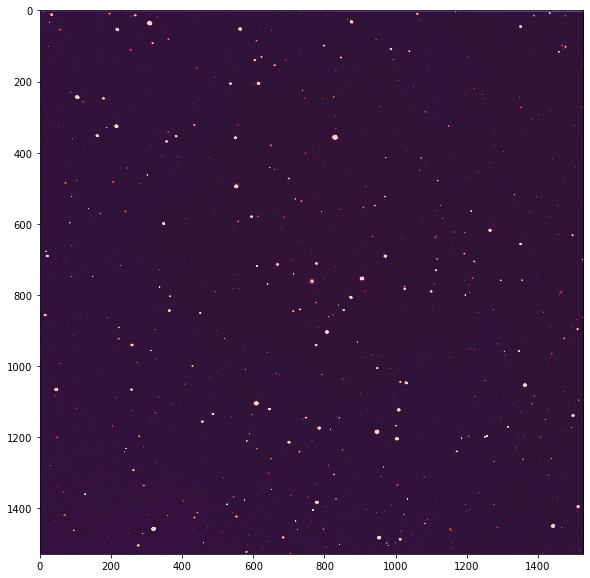

In [13]:
imageB1_data=imageB1[0].data
quicklookup(imageB1_data)

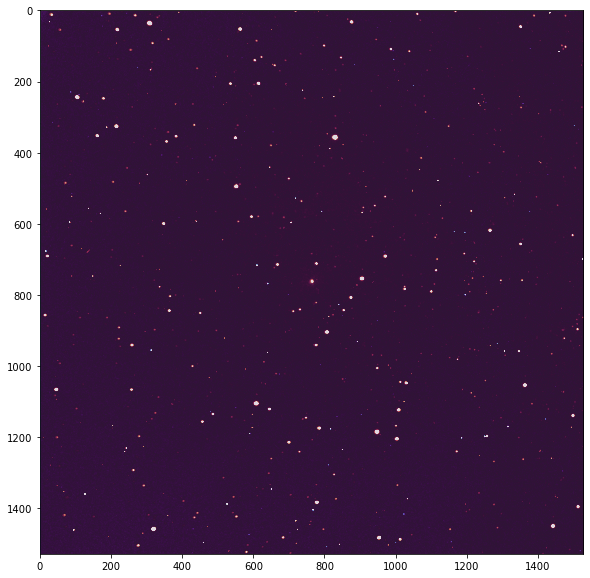

In [14]:
imageB2_data=imageB2[0].data
quicklookup(imageB2_data)

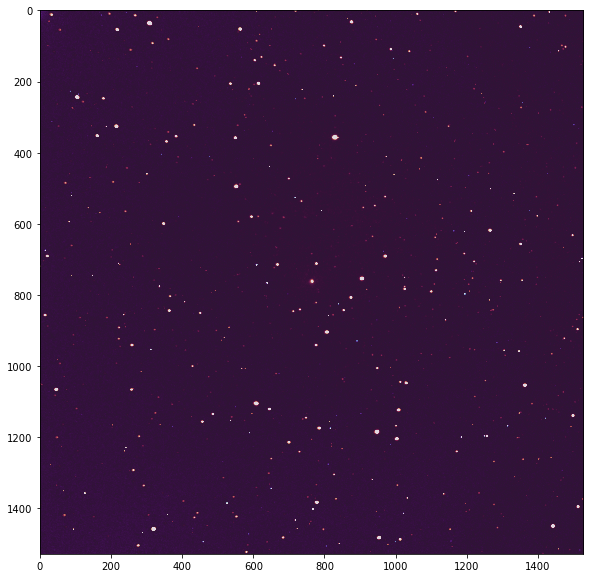

In [15]:
imageB3_data=imageB3[0].data
quicklookup(imageB3_data)

For V-channel

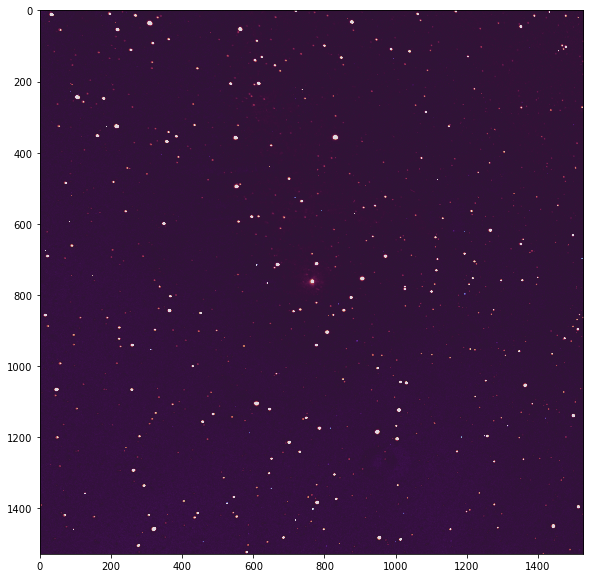

In [16]:
###For V-channel
imageV0_data=imageV0[0].data
quicklookup(imageV0_data)

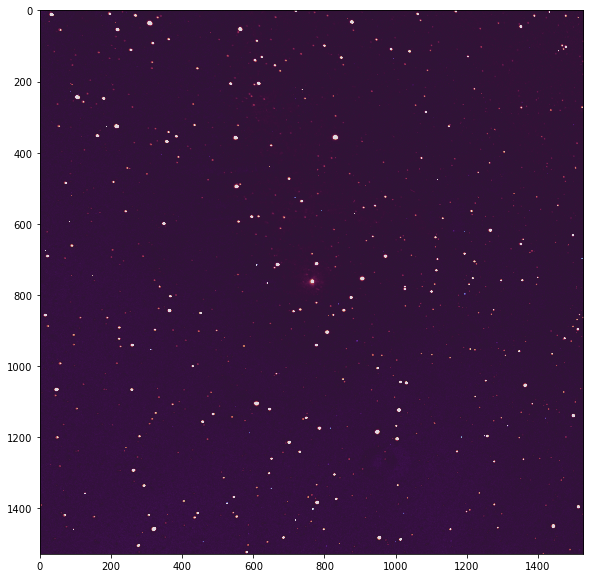

In [125]:

#!!!!!!!!!!!!!HAS STREAKS!!!!!!


imageV1_data=imageV1[0].data
quicklookup(imageV1_data)

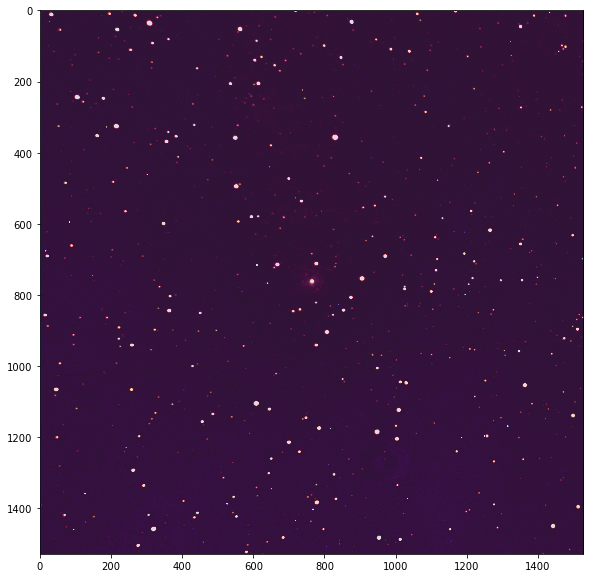

In [18]:
imageV2_data=imageV2[0].data
quicklookup(imageV2_data)

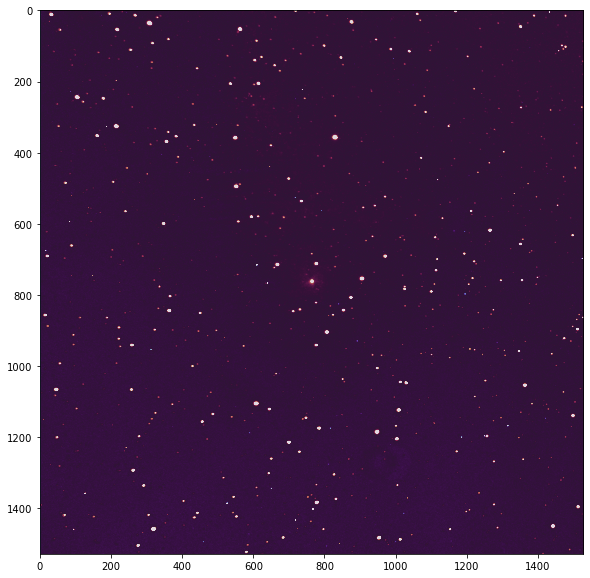

In [19]:
imageV3_data=imageV3[0].data
quicklookup(imageV3_data)

For r-channel

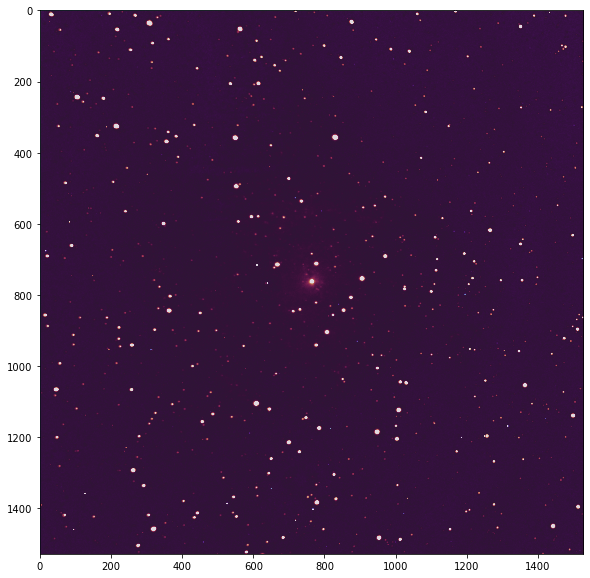

In [20]:
imager1_data=imager1[0].data
quicklookup(imager1_data)

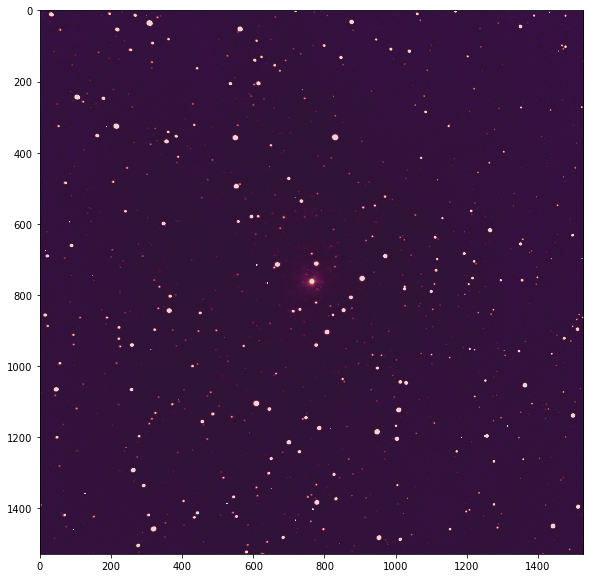

In [21]:
imager2_data=imager2[0].data
quicklookup(imager2_data)

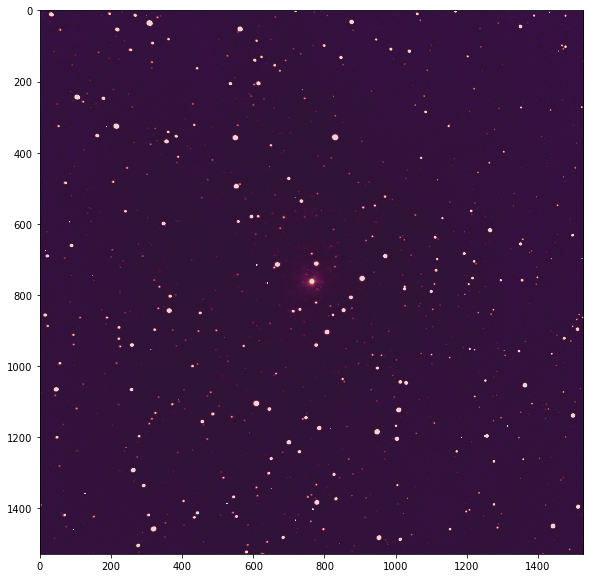

In [22]:
imager3_data=imager3[0].data
quicklookup(imager3_data)

There was a V-channel fits file with two streaks across it, labeled 'V1'. And so, I replaced the bad fits with a good(streak-less) one from ChRIS of the same object. The new fits file was named ' V0'.

# 2.2  Master images for channels

#### Part 1


Now let's conduct a statistical analysis of the quality of all the images.

First, let's define the functions that give us some quickstats, histogram and logarithmic histogram.

In [83]:
import scipy.stats as stats

def quickstats(input_image):
    '''Gives some quickstats for a given image.'''
    
    print ('Min:', np.min(input_image))
    print ('Max:', np.max(input_image))
    print ('Mean:', np.mean(input_image))
    print ('Median:', np.median(input_image))
    print ('Variance:', np.var(input_image))
    print ('Stdev:', np.std(input_image))

    
#   For below, xlo and xhi are the multipliers for the low and high end of the range
def histologplot(input_image,nbins,xlo,xhi):
    '''Generates a logarithmic histoplot for a given number of bins, xlo and xhi'''
    
    histlo = np.median(input_image)-xlo*np.std(input_image)
    histhi = np.median(input_image)+xhi*np.std(input_image)
    # and replot the histogram using a log axis
    plt.figure(figsize=(8,6))
    plt.title('Image Histogram (Log)')
    plt.xlabel('ADU')
    plt.ylabel('Log number of pixels')
    plt.yscale('log')
    plt.grid(True)
    _=plt.hist(input_image,bins=nbins,range=(histlo,histhi))

def histoplot(input_image,nbins,xlo,xhi):
    '''Generates a simple histoplot for a given number of bins, xlo and xhi'''
    
    histlo = np.median(input_image)-xlo*np.std(input_image)
    histhi = np.median(input_image)+xhi*np.std(input_image)
    # and replot the histogram using a log axis
    plt.figure(figsize=(8,6))
    plt.title('Image Histogram')
    plt.xlabel('ADU')
    plt.ylabel('Number of pixels')
    plt.grid(True)
    _=plt.hist(input_image,bins=nbins,range=(histlo,histhi))


Now, for each image, I will:                                                                           
    
    1) Find the CCD-temp, image type, filter and exposure time.
    
    2) Generate quickstats
    
    3) Generate the histo-plots, histolog-plots and a general plot of the image data.

### For B-channel

CCD-temp, image type, filter and exposure time

In [84]:

print ('B1.fits')
print ('Image type      = ', imageB1_head['IMAGETYP'])
print ('CCD temperature = ', imageB1_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageB1_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageB1_head['FILTER'])
print ()
print ('B2.fits')
print ('Image type      = ', imageB2_head['IMAGETYP'])
print ('CCD temperature = ', imageB2_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageB2_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageB2_head['FILTER'])
print ()
print ('B3.fits')
print ('Image type      = ', imageB3_head['IMAGETYP'])
print ('CCD temperature = ', imageB3_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageB3_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageB3_head['FILTER'])

B1.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  B

B2.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  B

B3.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  B


Generate Quickstats

In [85]:
print ('B1.fits')
quickstats(imageB1_data)
print()
print ('B2.fits')
quickstats(imageB2_data)
print()
print ('B3.fits')
quickstats(imageB3_data)
print()

B1.fits
Min: -66873.25
Max: 61293.707
Mean: 1163.1962
Median: 1159.6543
Variance: 82808.945
Stdev: 287.76544

B2.fits
Min: -74302.44
Max: 61738.61
Mean: 1150.4241
Median: 1146.0089
Variance: 83801.78
Stdev: 289.48538

B3.fits
Min: -74637.05
Max: 63029.0
Mean: 1094.6489
Median: 1088.4861
Variance: 92142.945
Stdev: 303.55057



Generate the plots

B1.fits Histoplot



Text(0.5, 1.0, 'image B1 data plot')

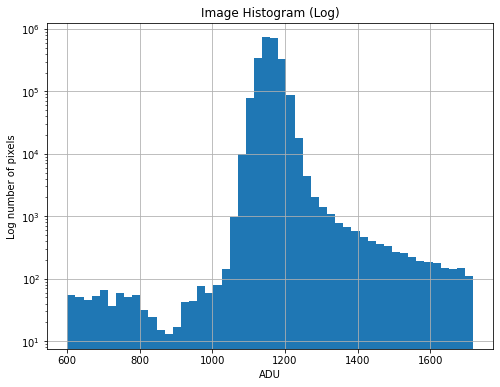

<Figure size 720x720 with 0 Axes>

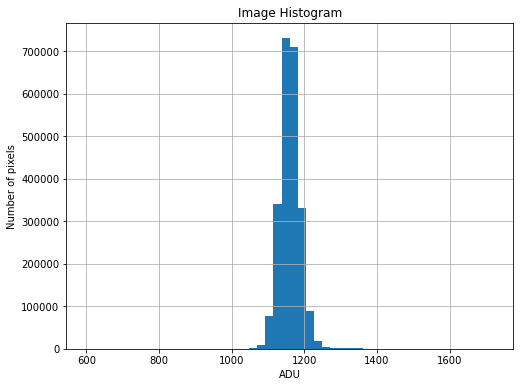

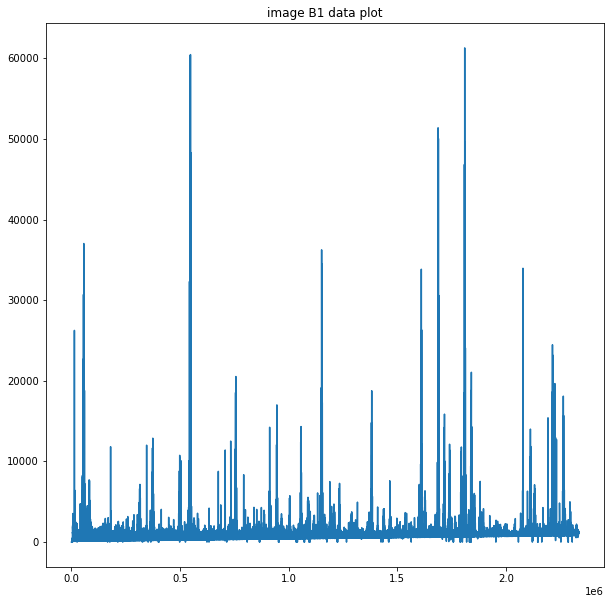

In [113]:
# first we need to flatten the image:
imageB1_flat = imageB1_data.flatten()
# and clean up unphysical negative values
imageB1_flat = np.where(imageB1_flat<0, 0, imageB1_flat)


print ('B1.fits Histoplot')
histologplot(imageB1_flat,50,2,2)
plt.figure()
histoplot(imageB1_flat,50,2,2)
#flat, g, x = qualitycheck(imageB1_flat)
#plt.plot(x,g,'r-.', label="stats.norm.pdf")


print()
plt.figure()
plt.plot(imageB1_flat)
plt.title('image B1 data plot')



B2.fits Histoplot



279.73553

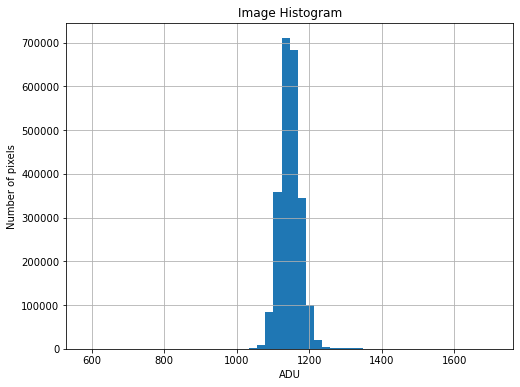

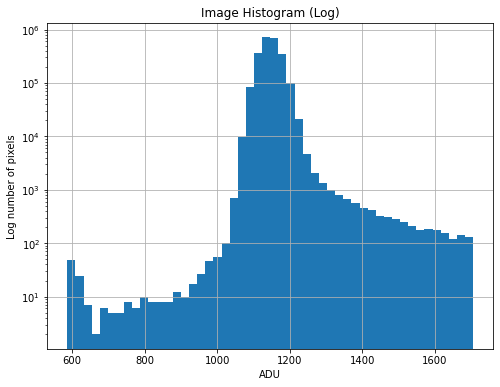

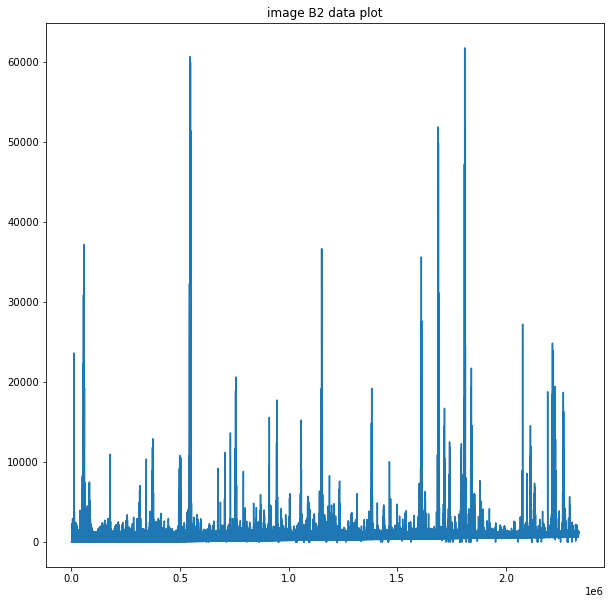

In [114]:
# first we need to flatten the image:
imageB2_flat = imageB2_data.flatten()
# and clean up unphysical negative values
imageB2_flat = np.where(imageB2_flat<0, 0, imageB2_flat)


print ('B2.fits Histoplot')

histoplot(imageB2_flat,50,2,2)
histologplot(imageB2_flat,50,2,2)
#x = np.linspace(800,1600,1000)
#x0, sigma = stats.norm.fit(imageB2_flat)
#gaussian = stats.norm.pdf(x,x0,sigma)
#plt.plot(x,gaussian**200,'r-.', label="stats.norm.pdf")

print()
plt.figure()
plt.plot(imageB2_flat)
plt.title('image B2 data plot')

sigma

B3.fits Histoplot



Text(0.5, 1.0, 'image B3 data plot')

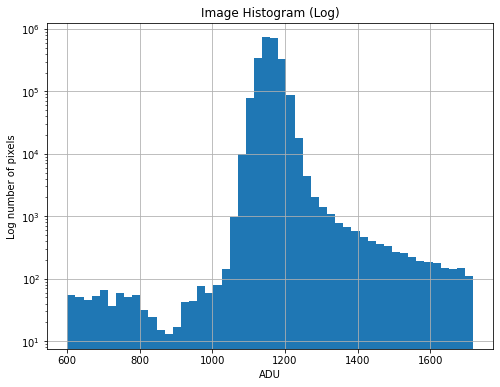

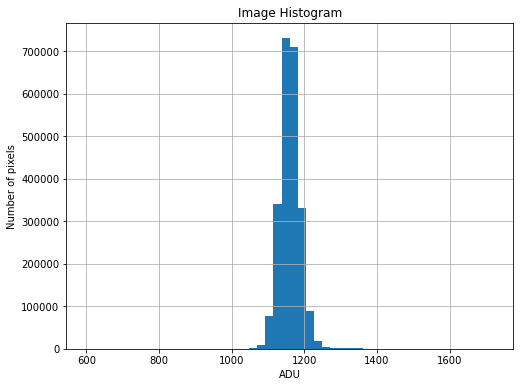

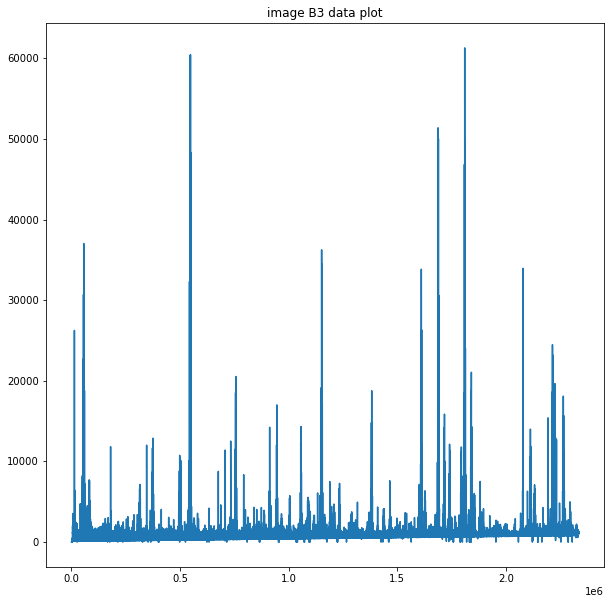

In [115]:
# first we need to flatten the image:
imageB3_flat = imageB1_data.flatten()
# and clean up unphysical negative values
imageB3_flat = np.where(imageB3_flat<0, 0, imageB3_flat)


print ('B3.fits Histoplot')
histologplot(imageB3_flat,50,2,2)
histoplot(imageB3_flat,50,2,2)
#flat, g, x = qualitycheck(imageB3_flat)
#plt.plot(x,g,'r-.', label="stats.norm.pdf")

print()
plt.figure()
plt.plot(imageB3_flat)
plt.title('image B3 data plot')


### For V-channel

In [29]:
print ('V0.fits')
print ('Image type      = ', imageV0_head['IMAGETYP'])
print ('CCD temperature = ', imageV0_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageV0_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageV0_head['FILTER'])
print ()
print ('V2.fits')
print ('Image type      = ', imageV2_head['IMAGETYP'])
print ('CCD temperature = ', imageV2_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageV2_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageV2_head['FILTER'])
print ()
print ('V3.fits')
print ('Image type      = ', imageV3_head['IMAGETYP'])
print ('CCD temperature = ', imageV3_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imageV3_head['EXPTIME'], ' seconds')
print ('Filter          = ', imageV3_head['FILTER'])

V0.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  V

V2.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  V

V3.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  V


Generate Quickstats

In [30]:
print ('V0.fits')
quickstats(imageV0_data)
print()
print ('V2.fits')
quickstats(imageV2_data)
print()
print ('V3.fits')
quickstats(imageV3_data)
print()

V0.fits
Min: -95738.445
Max: 73623.44
Mean: 3669.3816
Median: 3649.875
Variance: 451067.2
Stdev: 671.61536

V2.fits
Min: -39027.848
Max: 72550.11
Mean: 3797.8657
Median: 3782.5754
Variance: 386524.88
Stdev: 621.71124

V3.fits
Min: -48594.086
Max: 72781.71
Mean: 3689.412
Median: 3670.5137
Variance: 413657.56
Stdev: 643.1622



Generate Histoplots & Histologplots

V0.fits Histoplot



Text(0.5, 1.0, 'image V0 data plot')

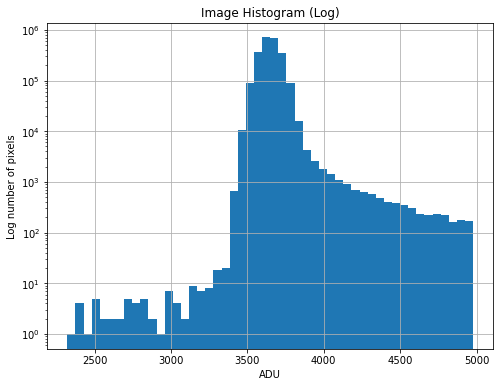

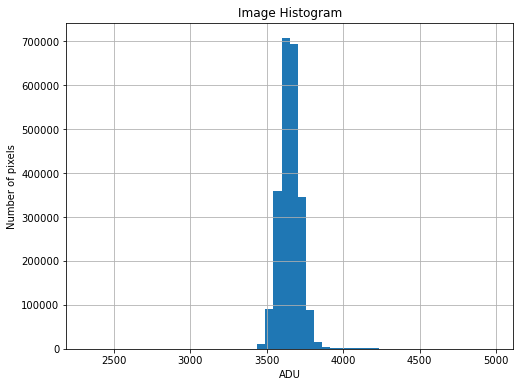

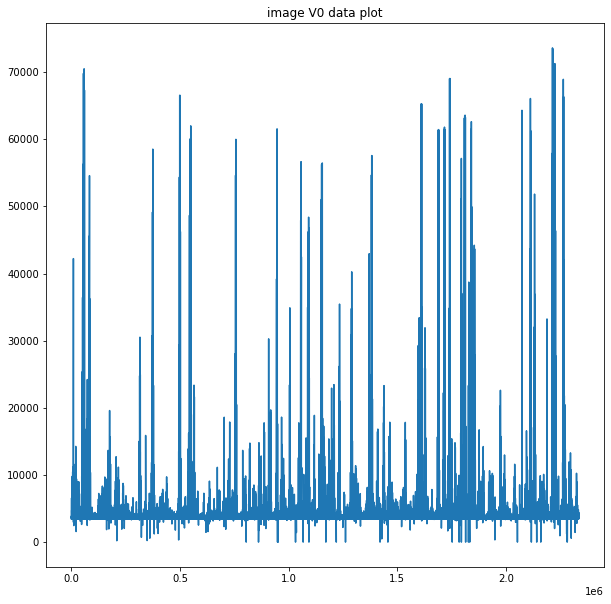

In [31]:
# first we need to flatten the image:
imageV0_flat = imageV0_data.flatten()
# and clean up unphysical negative values
imageV0_flat = np.where(imageV0_flat<0, 0, imageV0_flat)


print ('V0.fits Histoplot')
histologplot(imageV0_flat,50,2,2)
histoplot(imageV0_flat,50,2,2)

print()
plt.figure()
plt.plot(imageV0_flat)
plt.title('image V0 data plot')

V2.fits Histoplot



Text(0.5, 1.0, 'image V2 data plot')

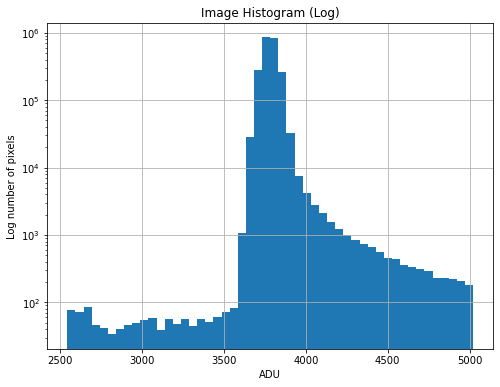

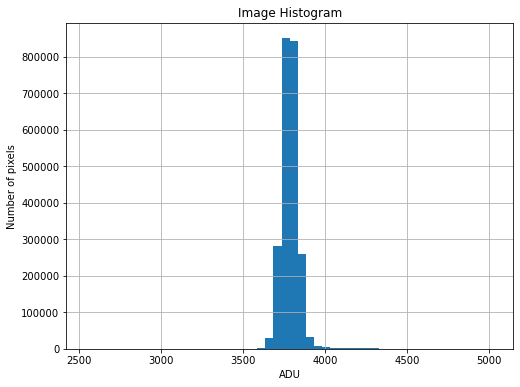

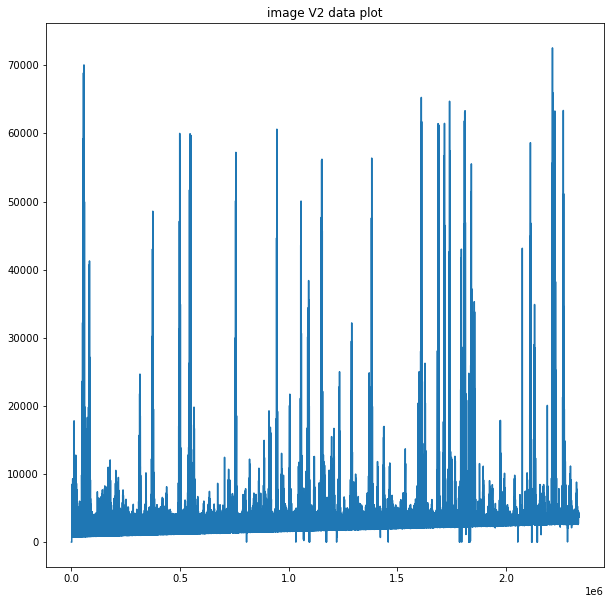

In [32]:
# first we need to flatten the image:
imageV2_flat = imageV2_data.flatten()
# and clean up unphysical negative values
imageV2_flat = np.where(imageV2_flat<0, 0, imageV2_flat)


print ('V2.fits Histoplot')
histologplot(imageV2_flat,50,2,2)
histoplot(imageV2_flat,50,2,2)

print()
plt.figure()
plt.plot(imageV2_flat)
plt.title('image V2 data plot')

V3.fits Histoplot



Text(0.5, 1.0, 'image V0 data plot')

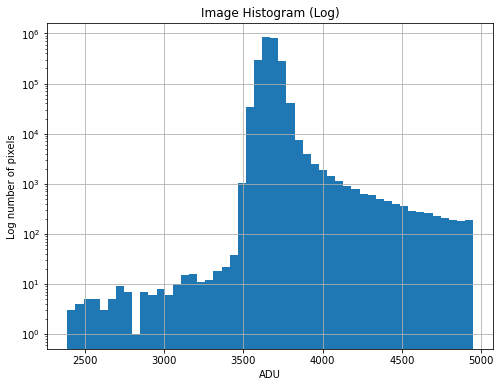

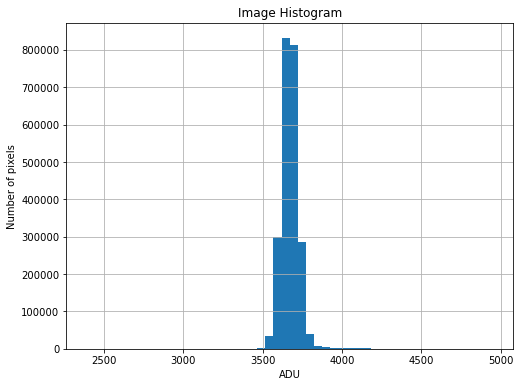

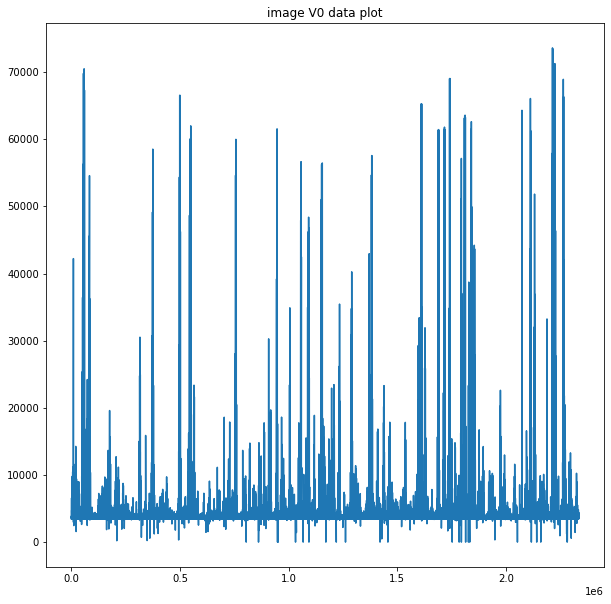

In [33]:
# first we need to flatten the image:
imageV3_flat = imageV3_data.flatten()
# and clean up unphysical negative values
imageV3_flat = np.where(imageV3_flat<0, 0, imageV3_flat)


print ('V3.fits Histoplot')
histologplot(imageV3_flat,50,2,2)
histoplot(imageV3_flat,50,2,2)

print()
plt.figure()
plt.plot(imageV0_flat)
plt.title('image V0 data plot')

### For r-channel

In [34]:
print ('r1.fits')
print ('Image type      = ', imager1_head['IMAGETYP'])
print ('CCD temperature = ', imager1_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imager1_head['EXPTIME'], ' seconds')
print ('Filter          = ', imager1_head['FILTER'])
print ()
print ('r2.fits')
print ('Image type      = ', imager2_head['IMAGETYP'])
print ('CCD temperature = ', imager2_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imager2_head['EXPTIME'], ' seconds')
print ('Filter          = ', imager2_head['FILTER'])
print ()
print ('r3.fits')
print ('Image type      = ', imager3_head['IMAGETYP'])
print ('CCD temperature = ', imager3_head['CCD-TEMP'], ' degrees C')
print ('Exposure time   = ', imager3_head['EXPTIME'], ' seconds')
print ('Filter          = ', imager3_head['FILTER'])

r1.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  r

r2.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  r

r3.fits
Image type      =  Light Frame
CCD temperature =  -20.0  degrees C
Exposure time   =  180.0  seconds
Filter          =  r


Generate Quickstats

In [35]:
print ('r1.fits')
quickstats(imager1_data)
print()
print ('r2.fits')
quickstats(imager2_data)
print()
print ('r3.fits')
quickstats(imager3_data)
print()

r1.fits
Min: -36278.215
Max: 71914.945
Mean: 4037.715
Median: 4009.3074
Variance: 635607.56
Stdev: 797.25

r2.fits
Min: -41759.836
Max: 71209.02
Mean: 4006.2795
Median: 3974.8662
Variance: 592492.25
Stdev: 769.73517

r3.fits
Min: -41759.836
Max: 71209.02
Mean: 4006.2795
Median: 3974.8662
Variance: 592492.25
Stdev: 769.73517



Generate Histoplots & Histologplots

r1.fits Histoplot



Text(0.5, 1.0, 'image r1 data plot')

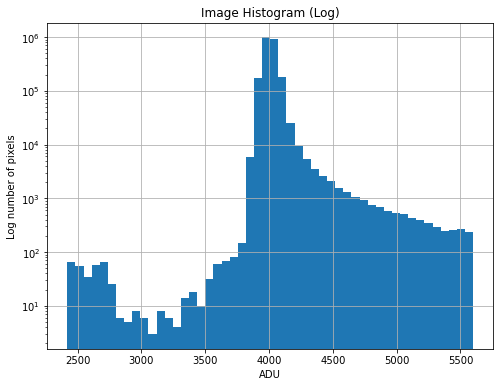

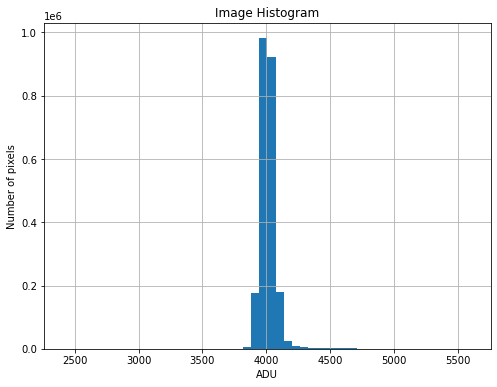

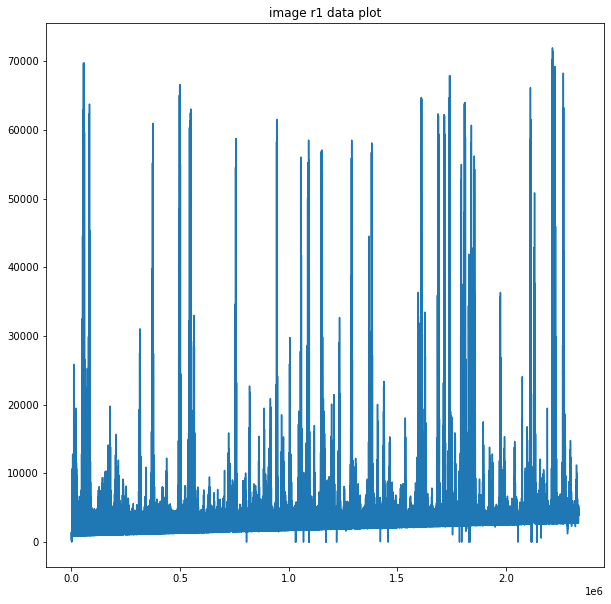

In [36]:
# first we need to flatten the image:
imager1_flat = imager1_data.flatten()
# and clean up unphysical negative values
imager1_flat = np.where(imager1_flat<0, 0, imager1_flat)


print ('r1.fits Histoplot')
histologplot(imager1_flat,50,2,2)
histoplot(imager1_flat,50,2,2)

print()
plt.figure()
plt.plot(imager1_flat)
plt.title('image r1 data plot')


r2.fits Histoplot



Text(0.5, 1.0, 'image r2 data plot')

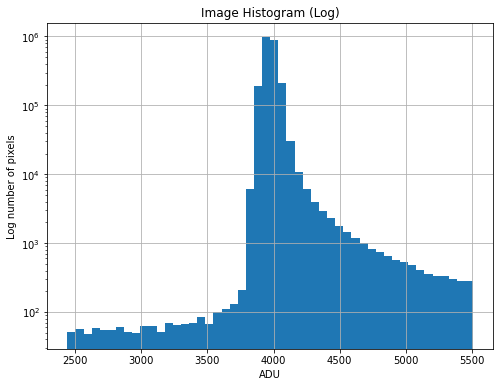

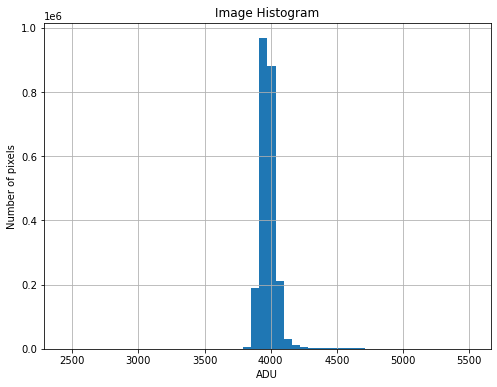

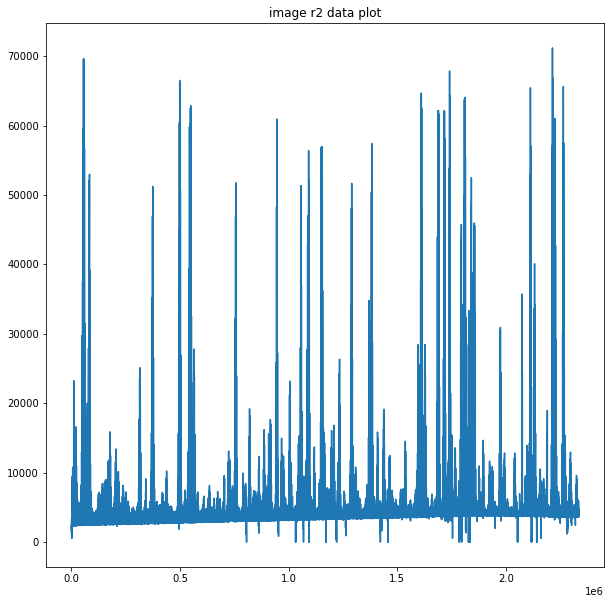

In [37]:
# first we need to flatten the image:
imager2_flat = imager2_data.flatten()
# and clean up unphysical negative values
imager2_flat = np.where(imager2_flat<0, 0, imager2_flat)


print ('r2.fits Histoplot')
histologplot(imager2_flat,50,2,2)
histoplot(imager2_flat,50,2,2)

print()
plt.figure()
plt.plot(imager2_flat)
plt.title('image r2 data plot')


r3.fits Histoplot



Text(0.5, 1.0, 'image r3 data plot')

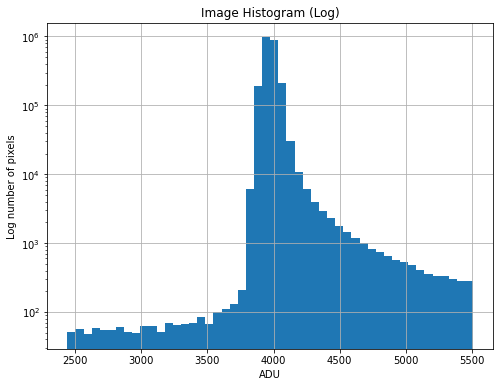

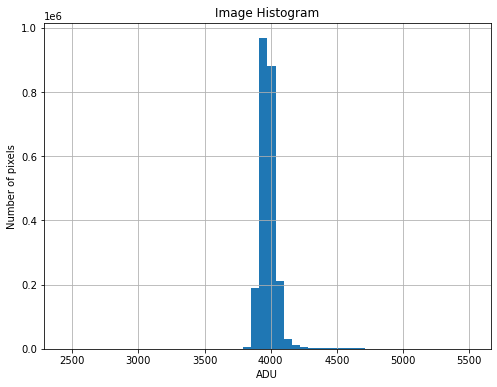

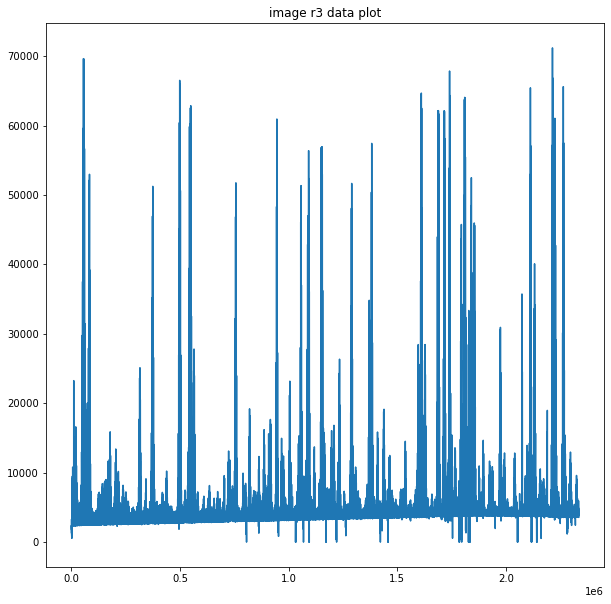

In [38]:
# first we need to flatten the image:
imager3_flat = imager3_data.flatten()
# and clean up unphysical negative values
imager3_flat = np.where(imager3_flat<0, 0, imager3_flat)


print ('r3.fits Histoplot')
histologplot(imager3_flat,50,2,2)
histoplot(imager3_flat,50,2,2)

print()
plt.figure()
plt.plot(imager3_flat)
plt.title('image r3 data plot')



As a preliminary check, I looked at the data from the header to see for any problems in the imaging condiotions. I also looked through the image stats to make sure their weren't any anomalies in the image data. All the images from each channel are very similar to each other with minor differences.


Now, I will plot all the image flats to compare them to see if their is any consderable differences that might affect their weightage.


Text(0.5, 1.0, 'image B3 data plot')

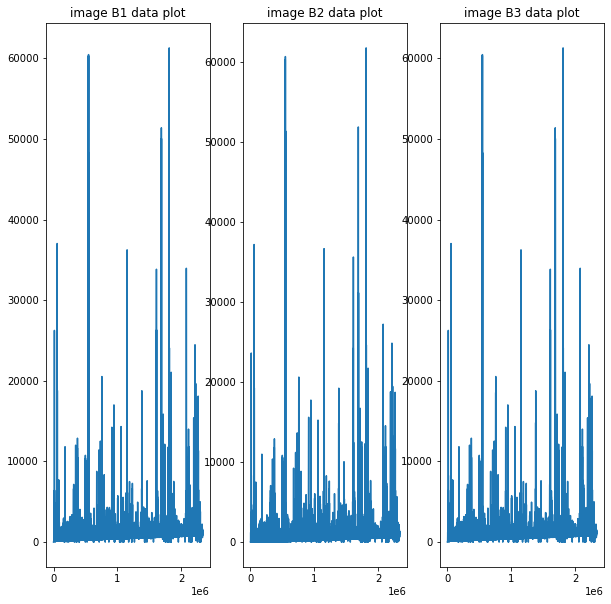

In [119]:
plt.subplot(131)
plt.plot(imageB1_flat)
plt.title('image B1 data plot')
plt.subplot(132)
plt.plot(imageB2_flat)
plt.title('image B2 data plot')
plt.subplot(133)
plt.plot(imageB3_flat)
plt.title('image B3 data plot')


Text(0.5, 1.0, 'image V3 data plot')

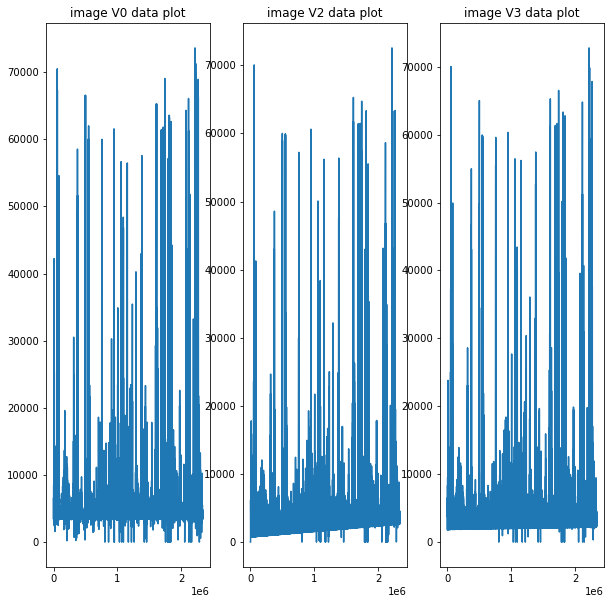

In [123]:

plt.subplot(131)
plt.plot(imageV0_flat)
plt.title('image V0 data plot')
plt.subplot(132)
plt.plot(imageV2_flat)
plt.title('image V2 data plot')
plt.subplot(133)
plt.plot(imageV3_flat)
plt.title('image V3 data plot')


Text(0.5, 1.0, 'image r3 data plot')

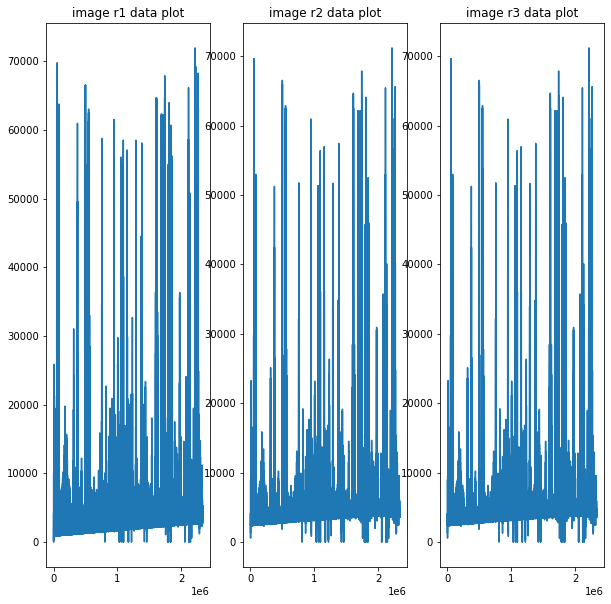

In [124]:
print()
plt.subplot(131)
plt.plot(imager1_flat)
plt.title('image r1 data plot')
plt.subplot(132)
plt.plot(imager2_flat)
plt.title('image r2 data plot')
plt.subplot(133)
plt.plot(imager3_flat)
plt.title('image r3 data plot')

The graphs for each channel seem to be very similar, and thus, for the master image, I will be giving them the same weighted mean.

#### Part 2

Now we create a channel master image by adding them up in a statistically appropriate way.

B-channel Master image

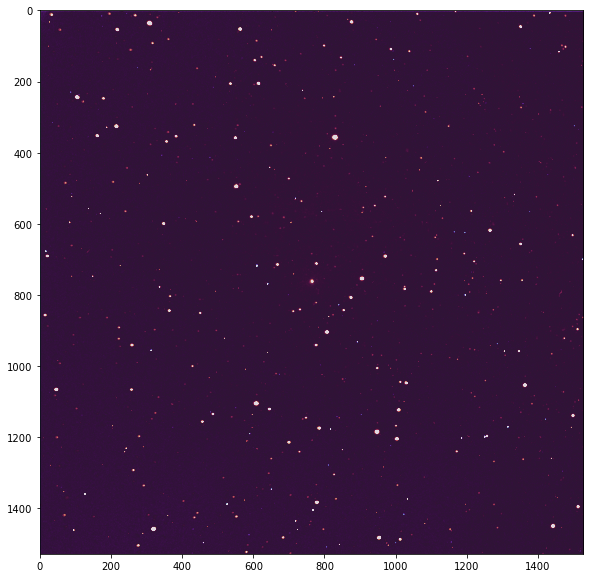

In [39]:
B = np.add(imageB1_data, imageB2_data, imageB3_data)
B_Master = B/3
quicklookup(B_Master)

Text(0.5, 1.0, 'image B_Master data plot')

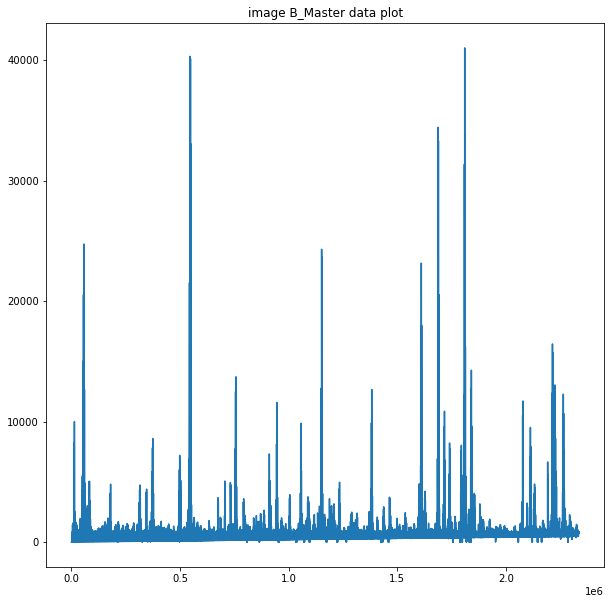

In [40]:
# first we need to flatten the image:
B_Master_flat = B_Master.flatten()
# and clean up unphysical negative values
B_Master_flat = np.where(B_Master_flat<0, 0, B_Master_flat)

plt.figure()
plt.plot(B_Master_flat)
plt.title('image B_Master data plot')


V-channel Master image

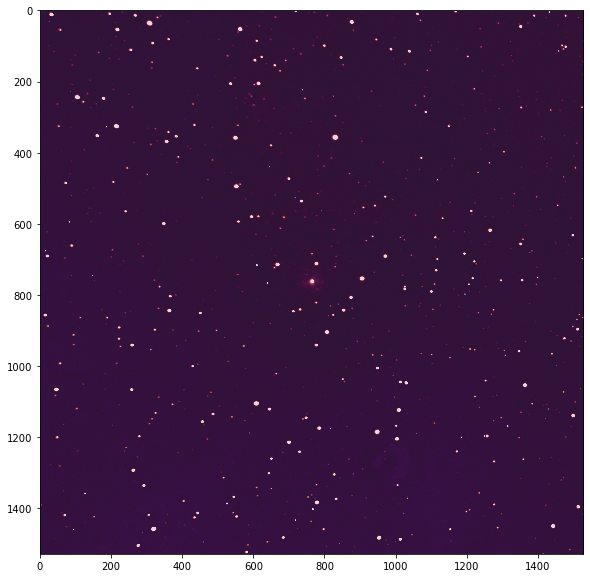

In [41]:
V = np.add(imageV0_data, imageV2_data, imageV3_data)
V_Master = V/3
quicklookup(V_Master)

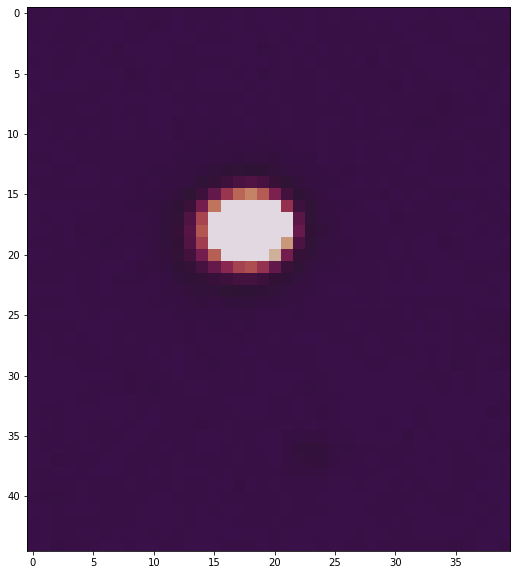

In [42]:

subset1 = V_Master[1105:1150,990:1030]
quicklookup(subset1)


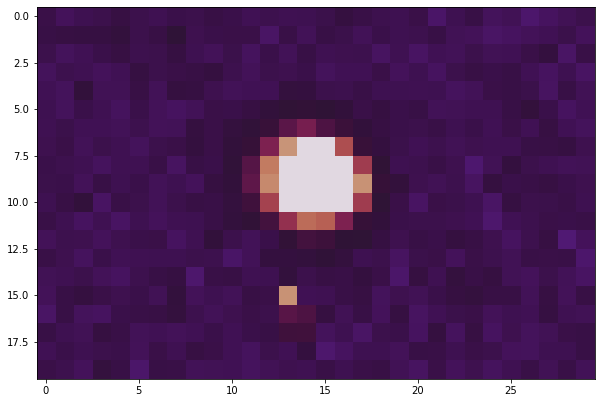

In [43]:
subset2 = V_Master[750:770,1280:1310]
quicklookup(subset2)

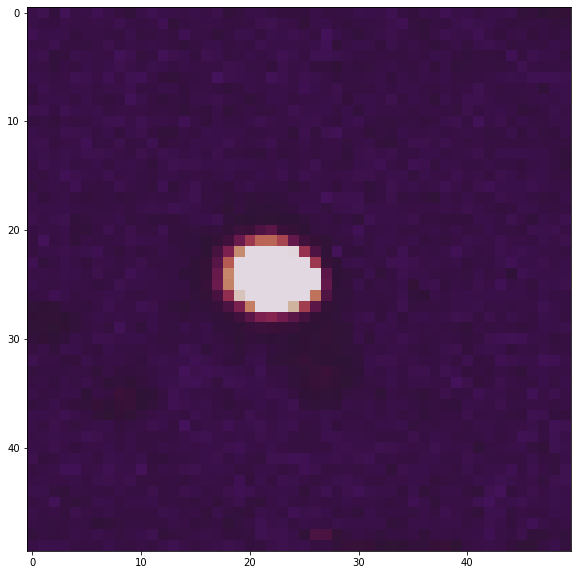

In [44]:
subset3 = V_Master[575:625,325:375]
quicklookup(subset3)

Text(0.5, 1.0, 'image V_Master data plot')

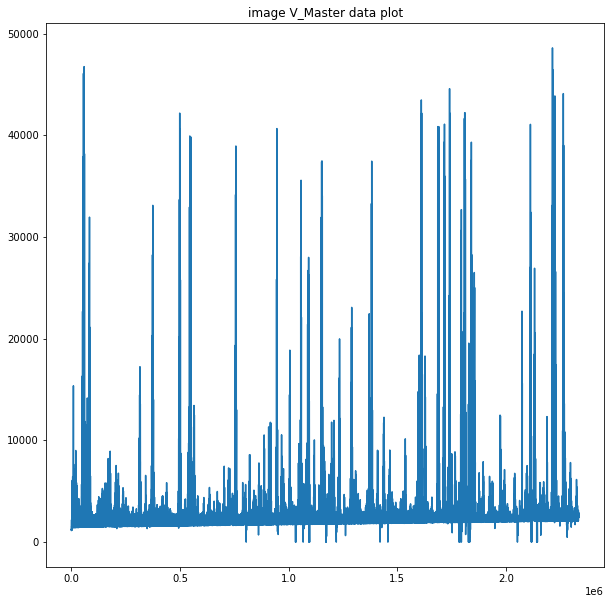

In [45]:
# first we need to flatten the image:
V_Master_flat = V_Master.flatten()
# and clean up unphysical negative values
V_Master_flat = np.where(V_Master_flat<0, 0, V_Master_flat)

plt.figure()
plt.plot(V_Master_flat)
plt.title('image V_Master data plot')


r-channel Master image

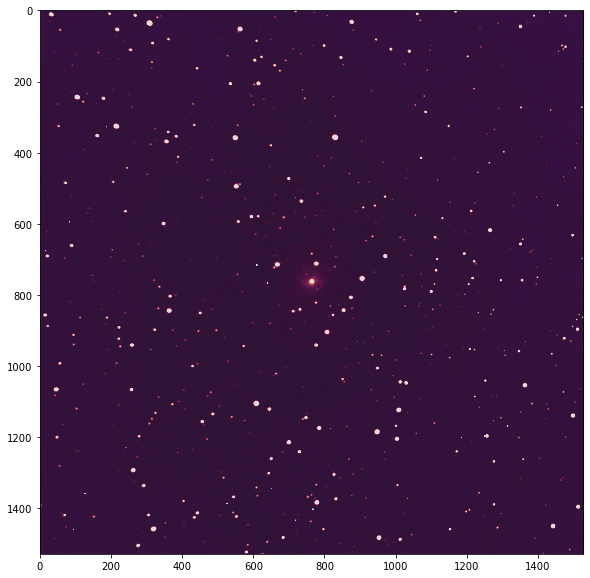

In [46]:
r = np.add(imager1_data, imager2_data, imager3_data)
r_Master = r/3
quicklookup(r_Master)

Text(0.5, 1.0, 'image r_Master data plot')

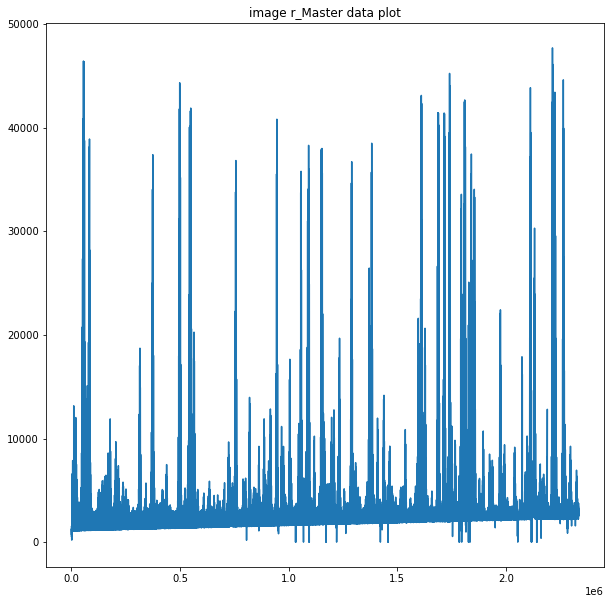

In [47]:
# first we need to flatten the image:
r_Master_flat = r_Master.flatten()
# and clean up unphysical negative values
r_Master_flat = np.where(r_Master_flat<0, 0, r_Master_flat)

plt.figure()
plt.plot(r_Master_flat)
plt.title('image r_Master data plot')


I carried out a simple average of the three images from each filter. I didn't really have any idea on what other method to use as this one seemed to give a decent result.

# 2.3 Point Spread Function (psf ) comparisons

#### Part 1 

For this part, we will first create a gaussian function.

In [205]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#
#As I had not properly done task 5, I had to get the Gauss2D function from someone else's notebook.
#I used Gregor Cavlovic's session 5b notebook to get the function. Forgive me.

def Gauss2D(x, mux, muy, sigmax, sigmay, amplitude, offset, rotation):
    assert len(x) == 2
    X = x[0]
    Y = x[1]
    A = (np.cos(rotation)**2)/(2*sigmax**2) + (np.sin(rotation)**2)/(2*sigmay**2)
    B = (np.sin(rotation*2))/(4*sigmay**2) - (np.sin(2*rotation))/(4*sigmax**2)
    C = (np.sin(rotation)**2)/(2*sigmax**2) + (np.cos(rotation)**2)/(2*sigmay**2)
    G = amplitude*np.exp(-((A * (X - mux) ** 2) + (2 * B * (X - mux) * (Y - muy)) + (C * (Y - muy) ** 2))) + offset
    return G.ravel()

#### Part 2

Now we select the stars that we will be using.

Populating the interactive namespace from numpy and matplotlib


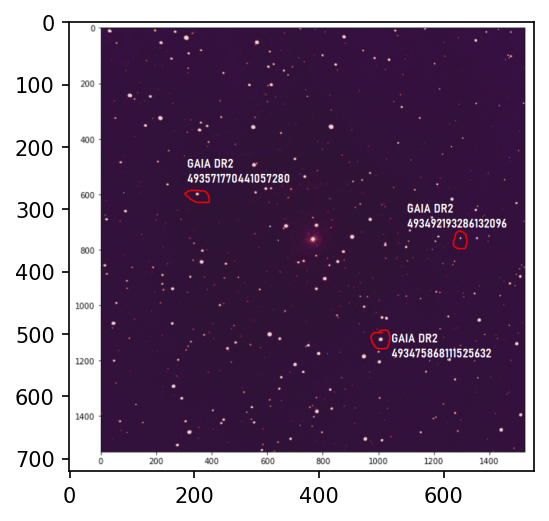

In [49]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(4, 4), dpi=150)
img = mpimg.imread('Capture.png')
imgplot = plt.imshow(img)
plt.show()

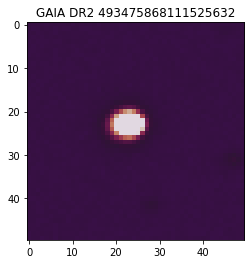

In [50]:
plt.title('GAIA DR2 493475868111525632')
subset1 = V_Master[1100:1150,985:1035]
quicklookup(subset1)

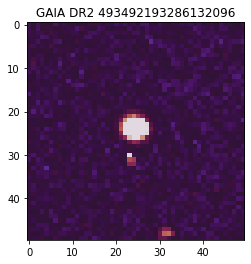

In [51]:
plt.title('GAIA DR2 493492193286132096')
subset2 = V_Master[735:785,1270:1320]
quicklookup(subset2)

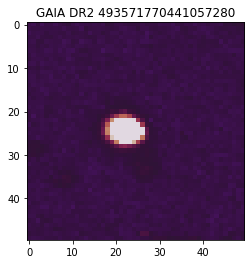

In [52]:
plt.title('GAIA DR2 493571770441057280')
subset3 = V_Master[575:625,325:375]
quicklookup(subset3)

1) GAIA DR2 493475868111525632           RA=03h 48m 06.8s       Dec=+68° 03' 14.0"      Mag=11.38

2) GAIA DR2 493571770441057280           RA=03h 50m 20.7s       Dec=+68° 13' 10.2"      Mag=12.63

3) GAIA DR2 493492193286132096           RA=03h 47m 08.0s       Dec=+68° 10' 04.0"      Mag=14.19





Since all are in GAIA catalogue, we can be sure that the objects are indeed stars.

#### Part 3

## For Channel-V Master image

Optimized Parameters : [ 2.30463501e+01  2.28687632e+01  1.69665452e+00  1.34068847e+00
  4.41622239e+04  2.47419788e+03 -6.90822772e+01]


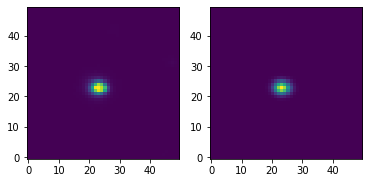

In [53]:
###### For the channel V
from scipy import optimize

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 4.1, 3., 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitV1 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitV1, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

Optimized Parameters : [2.46648444e+01 2.38136365e+01 9.88527792e-01 1.21103616e+00
 4.45940901e+03 2.47914774e+03 1.42673295e+04]


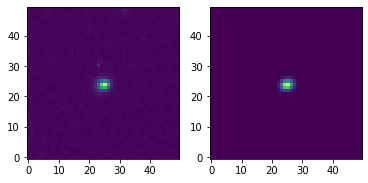

In [54]:
x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.6, 3., 1.0, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitV2 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitV2, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

Optimized Parameters : [ 2.26363406e+01  2.44120218e+01  1.43884483e+00  1.90610680e+00
  9.64390171e+03  2.48555666e+03 -7.97812410e+00]


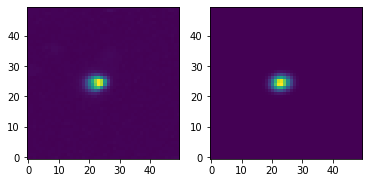

In [55]:
x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.9, 2., 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitV3 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitV3, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

#### Part 4

## For Channel-V image 1 

Optimized Parameters : [ 2.34877956e+01  2.29644173e+01  1.57997595e+00  1.24313973e+00
  7.50875299e+04  3.63745572e+03 -6.94216504e+02]


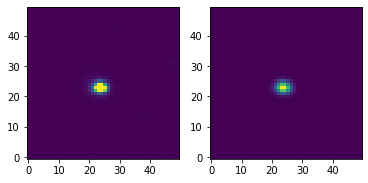

In [56]:
subset1 = imageV0_data[1100:1150,985:1035]

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.6, 3.2, 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

Optimized Parameters : [ 2.50152452e+01  2.38987222e+01  8.39259401e-01  9.97988094e-01
  9.59036391e+03  3.65661685e+03 -4.91310617e+00]


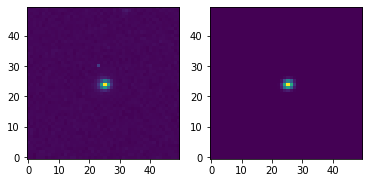

In [57]:
subset2 = imageV0_data[735:785,1270:1320]

x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 5.3, 2.1, 1.5, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

Optimized Parameters : [ 2.30676909e+01  2.45062738e+01  1.36111361e+00  1.76698995e+00
  1.66907559e+04  3.65889382e+03 -1.74094982e+01]


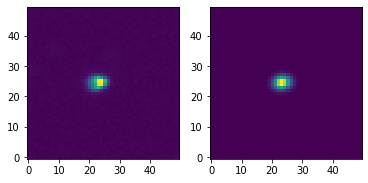

In [58]:
subset3 = imageV0_data[575:625,325:375]

x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.8, 2.1, 2.4, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

## For Channel-V image 2

Optimized Parameters : [2.25585190e+01 2.27556338e+01 1.69925354e+00 1.44484072e+00
 6.33902043e+04 3.78074278e+03 1.88662388e+02]


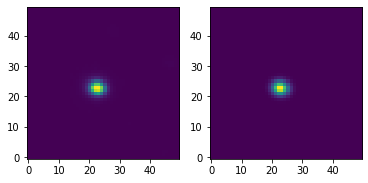

In [59]:
subset1 = imageV2_data[1100:1150,985:1035]

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.8, 3.2, 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

Optimized Parameters : [ 2.41101629e+01  2.36739347e+01  1.20555807e+00  1.25828652e+00
  5.34928959e+03  3.78049587e+03 -4.87798824e+00]


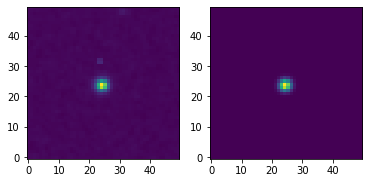

In [60]:
subset2 = imageV2_data[735:785,1270:1320]

x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 5.3, 2.1, 1.5, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

Optimized Parameters : [ 2.21501453e+01  2.43070272e+01  1.52173483e+00  1.93243698e+00
  1.32900231e+04  3.79808771e+03 -4.56338466e+01]


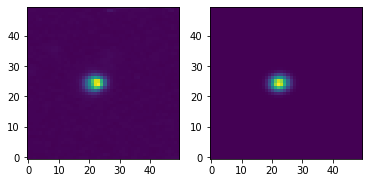

In [61]:
subset3 = imageV2_data[575:625,325:375]

x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.8, 2.3, 2.4, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

## For Channel-V image 3

Optimized Parameters : [2.30463492e+01 2.28687632e+01 1.34068812e+00 1.69665349e+00
 1.32486730e+05 7.42259398e+03 2.65497341e+02]


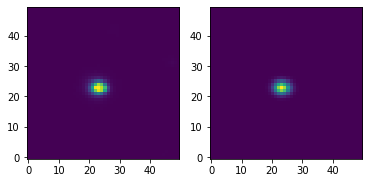

In [62]:
subset1 = imageV3_data[1100:1150,985:1035]

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.9, 3., 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

Optimized Parameters : [ 2.46648481e+01  2.38136369e+01  9.88522946e-01  1.21103130e+00
  1.33782861e+04  7.43744341e+03 -8.06752982e+00]


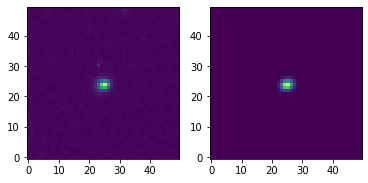

In [63]:
subset2 = imageV3_data[735:785,1270:1320]

x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 4.5, 2.1, 1.5, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

Optimized Parameters : [ 2.26363346e+01  2.44120211e+01  1.43884232e+00  1.90610255e+00
  2.89317618e+04  7.45667039e+03 -5.51020152e+01]


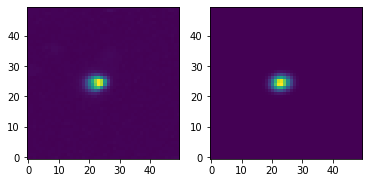

In [64]:
subset3 = imageV3_data[575:625,325:375]

x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.8, 2.3, 2.4, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fit = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fit, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

Now we will compare the sigma of the gaussian fit to the psf obtained for the 3 stars in all three images
of one channel and then on the master of the same channel.

The 3_rd and 4_th parametrs of the optimized parameters for each cell are the x-sigma and y-sigma respectively.

For GAIA DR2 493475868111525632

                       sigma-x    sigma-y

V-channel Image 1:  1.57997595e+00 |||  1.24313973e+00 

V-channel Image 2:  1.69925354e+00 |||  1.44484072e+00

V-channel Image 3:  1.34068812e+00 |||  1.69665349e+00


V-channel Master  :  1.69665452e+00 |||  1.34068847e+00



    

For GAIA DR2 493492193286132096

                        sigma-x    sigma-y

V-channel Image 1:  8.39259401e-01 |||  9.97988094e-01 

V-channel Image 2:  1.20555807e+00 |||  1.25828652e+00

V-channel Image 3:  9.88522946e-01 |||  1.21103130e+00


V-channel Master  : 9.88527792e-01 ||| 1.21103616e+00

For GAIA DR2 493571770441057280

                       sigma-x    sigma-y

V-channel Image 1:  1.36111361e+00 |||  1.76698995e+00 

V-channel Image 2:  1.52173483e+00 |||  1.93243698e+00

V-channel Image 3:  1.43884232e+00 |||  1.90610255e+00


V-channel Master :  1.43884483e+00 ||| 1.90610680e+00

_______________________________________________________________________________________________________________________________
The sigma-x of Image 2 and the sigma-y of image 3 are higher than the rest in general. 



For GAIA DR2 493475868111525632:
    The master image's sigma-x was on the higher end and sigma-y was closer to middle of the three images.

For GAIA DR2 493492193286132096:
    In this image, the master image was close to the middle for both x & y sigma.

For GAIA DR2 493571770441057280:
    Inthis image, as with the previous star, the master image's x & y sigma is in the middle.

________________________________________________________________________________________________________________________________
#### Part 5
Now we will carry out the process for B-channel and r-channel Master images.

## For B-channel Master image

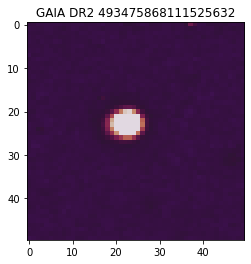

In [65]:
plt.title('GAIA DR2 493475868111525632')
subset1 = B_Master[1100:1150,985:1035]
quicklookup(subset1)

Optimized Parameters : [ 2.26232311e+01  2.27511465e+01  1.27396758e+00  1.50396108e+00
  1.02912471e+04  7.73841077e+02 -4.54665053e+01]


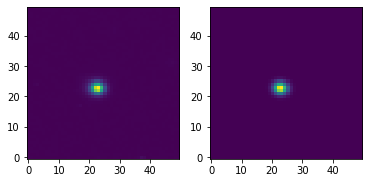

In [66]:
subset1 = B_Master[1100:1150,985:1035]

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 5.2, 3.1, 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitB1 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitB1, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

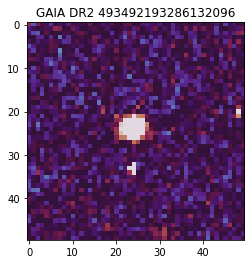

In [67]:
plt.title('GAIA DR2 493492193286132096')
subset2 = B_Master[735:785,1270:1320]
quicklookup(subset2)

Optimized Parameters : [ 24.07587557  23.68104778   1.23437855   1.31077734 806.8521339
 771.90303812 -11.08835533]


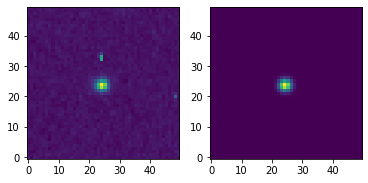

In [68]:
subset2 = B_Master[735:785,1270:1320]

x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 3.5, 2.1, 1.5, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitB2 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitB2, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

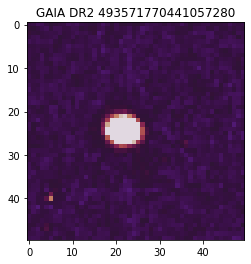

In [69]:
plt.title('GAIA DR2 493571770441057280')
subset3 = B_Master[575:625,325:375]
quicklookup(subset3)

Optimized Parameters : [ 2.19922039e+01  2.43036612e+01  1.93874857e+00  1.59301932e+00
  2.47726472e+03  7.71048323e+02 -5.34927144e+01]


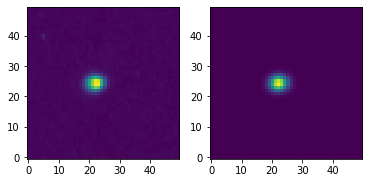

In [70]:
subset3 = B_Master[575:625,325:375]

x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.8, 2.3, 2.4, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitB3 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitB3, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

## For r-channel Master image

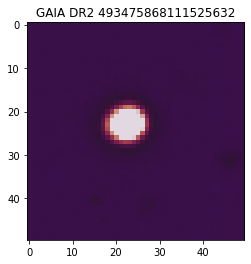

In [71]:
plt.title('GAIA DR2 493475868111525632')
subset1 = r_Master[1100:1150,985:1035]
quicklookup(subset1)

Optimized Parameters : [ 2.25592718e+01  2.27969600e+01  1.78679875e+00  2.03576088e+00
  4.66124378e+04  2.68363438e+03 -1.33073995e+00]


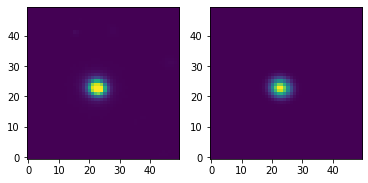

In [72]:
subset1 = r_Master[1100:1150,985:1035]

x1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset1), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset1.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 6.2, 0.8, 1., 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitr1 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset1, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitr1, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493475868111525632##############################

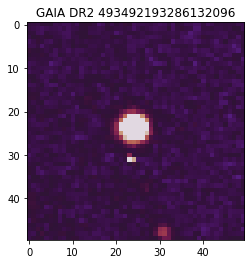

In [73]:
plt.title('GAIA DR2 493492193286132096')
subset2 = r_Master[735:785,1270:1320]
quicklookup(subset2)

Optimized Parameters : [2.41175696e+01 2.37077553e+01 1.39781091e+00 1.28417602e+00
 4.61462724e+03 2.65119900e+03 6.58534830e+01]


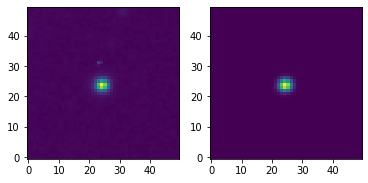

In [74]:
subset2 = r_Master[735:785,1270:1320]

x1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset2), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset2.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 2.4, 2.9, 1.5, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitr2 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset2, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitr2, origin='lower') 
                  
    
    
          ##########################For GAIA DR2 493492193286132096##############################

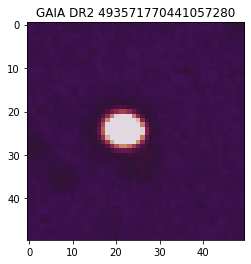

In [75]:
plt.title('GAIA DR2 493571770441057280')
subset3 = r_Master[575:625,325:375]
quicklookup(subset3)

Optimized Parameters : [ 2.21559309e+01  2.43027463e+01  2.07519021e+00  1.74004992e+00
  1.01874665e+04  2.68548059e+03 -9.72929827e-02]


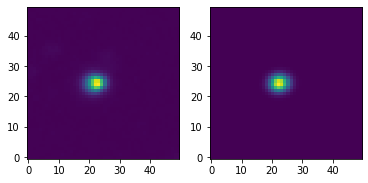

In [76]:
subset3 = r_Master[575:625,325:375]

x1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
y1d = np.arange(len(subset3), dtype=float)   # A 1D array of N side
xx , yy = np.meshgrid(x1d, y1d)     # Two unpacked 2D arrays NxN with both set of coordinates.

size = xx.shape
x = np.vstack((xx.ravel(), yy.ravel()))   # A 2xN^2 array with the pair of coordinates corresponding to the unpacked data.
y = subset3.ravel()                        # Unpacked data (1xN^2)

po = np.asarray([60.,45., 3.9, 0.5, 2.4, 0., 0.], dtype=float) #Build the array of parameters for initial guess

popt,pcov = optimize.curve_fit(Gauss2D, x, y, po) #Use our generic 2D gaussian fit and fit the data.
print('Optimized Parameters :',popt)

z_fit_1d = Gauss2D(x, *popt)              # Create the unpacked fit
Z_fitr3 = z_fit_1d.reshape(size)            # Reshape it as the original NxN

plt.figure()                              # You should see below the image (left) compared to the fit (right)
plt.subplot(121)
plt.imshow(subset3, origin='lower') 
plt.subplot(122)
plt.imshow(Z_fitr3, origin='lower') 
                  
    
    
          ##########################GAIA DR2 493571770441057280##############################

________________________________________________________________________________________________________________________________
For this part of the task, I will compare the sigma of the 3 psfs of one star in the three master images. The star I have chosen is For GAIA DR2 493492193286132096 (the 2nd star).

B-Channel Master :    x-sigma = 1.23437855                y-sigma = 1.31077734
V-Channel Master :    x-sigma = 0.988527792               y-sigma = 1.21103616
r-Channel Master :    x-sigma = 1.39781091                y-sigma = 1.28417602


The x-sigma and y-sigma of the three channels are very close to each other (within 25% of each other). But the V-channel has the lowest x & y sigma values. This might be because the V-channel has clearer images of these three stars, which I agree with after visual comparison of the three channels' images.
_______________________________________________________________________________________________________________________________






### Part 6 of 2.3 to be completed

# 2.4 Basic Photometry

#### Part 1

For this part of the task, we will first create a subset for each star in each master image which basically forms a tight square (10 x 10 pixels) around the stars.

### For B-channel Master image

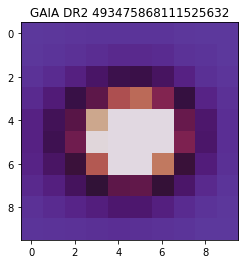

In [133]:
plt.title('GAIA DR2 493475868111525632')
subsetB1 = B_Master[1118:1128,1003:1013]
quicklookup(subsetB1)

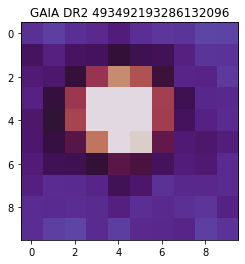

In [78]:
plt.title('GAIA DR2 493492193286132096')
subsetB2 = B_Master[755:765,1290:1300]
quicklookup(subsetB2)

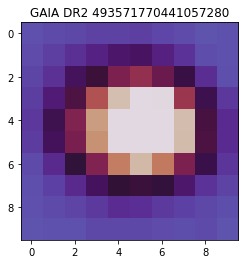

In [79]:
plt.title('GAIA DR2 493571770441057280')
subsetB3 = B_Master[595:605,342:352]
quicklookup(subsetB3)

### For V-channel Master image

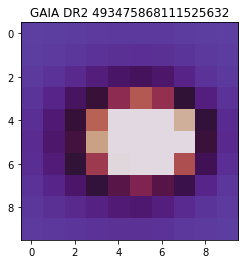

In [80]:
plt.title('GAIA DR2 493475868111525632')
subsetV1 = V_Master[1118:1128,1003:1013]
quicklookup(subsetV1)

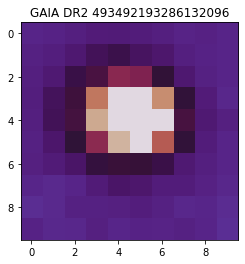

In [81]:
plt.title('GAIA DR2 493492193286132096')
subsetV2 = V_Master[755:765,1290:1300]
quicklookup(subsetV2)

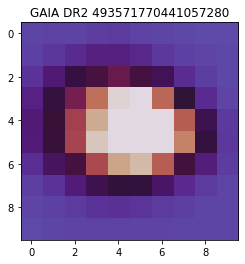

In [82]:
plt.title('GAIA DR2 493571770441057280')
subsetV3 = V_Master[595:605,343:353]
quicklookup(subsetV3)

### For r-channel Master image

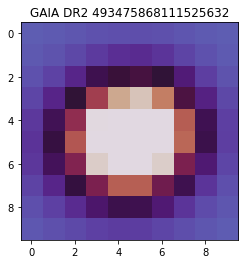

In [83]:
plt.title('GAIA DR2 493475868111525632')
subsetr1 = r_Master[1118:1128,1003:1013]
quicklookup(subsetr1)

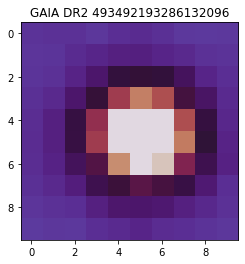

In [84]:
plt.title('GAIA DR2 493492193286132096')
subsetr2 = r_Master[754:764,1289:1299]
quicklookup(subsetr2)

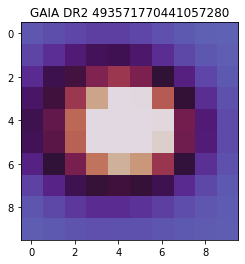

In [85]:
plt.title('GAIA DR2 493571770441057280')
subsetr3 = r_Master[595:605,343:353]
quicklookup(subsetr3)

_______________________________________________________________________________________________________________________________
Now we will sum the values in each square aperture and minus the sky background.


Here, I will calculate the sky background of each Master image by taking an average of all the values in its 'flats' data as most of the pixels are just the sky as you can tell by the graphs in the final part of Task 2.2. And the number of pixels in each image is 100 pixels.

### For B-channel Master image

The sum of the pixels w/o skyBG is 130581.71 ADU


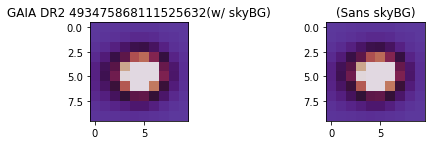

In [86]:
#Create the subsets for the images with skyBG and without skyBG.
subsetB1 = B_Master[1118:1128,1003:1013]
skysubsetB1 = subsetB1 - np.mean(B_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493475868111525632(w/ skyBG)')
quicklookup(subsetB1)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetB1)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetB1),'ADU')

The sum of the pixels w/o skyBG is 8825.574 ADU


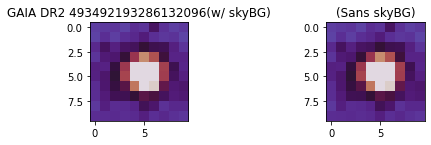

In [87]:
#Create the subsets for the images with skyBG and without skyBG.
subsetB2 = B_Master[754:764,1289:1299]
skysubsetB2 = subsetB2 - np.mean(B_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493492193286132096(w/ skyBG)')
quicklookup(subsetB2)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetB2)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetB2),'ADU')

The sum of the pixels w/o skyBG is 47369.812 ADU


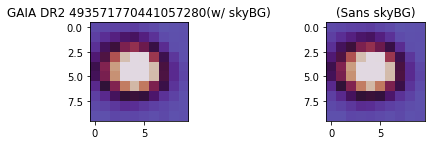

In [88]:
#Create the subsets for the images with skyBG and without skyBG.
subsetB3 = B_Master[595:605,343:353]
skysubsetB3 = subsetB3 - np.mean(B_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493571770441057280(w/ skyBG)')
quicklookup(subsetB3)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetB3)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetB3),'ADU')

### For V-channel Master image

The sum of the pixels w/o skyBG is 636962.2 ADU


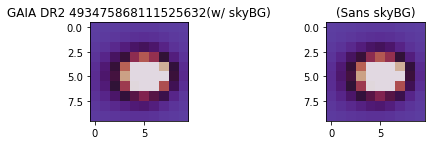

In [89]:
#Create the subsets for the images with skyBG and without skyBG.
subsetV1 = V_Master[1118:1128,1003:1013]
skysubsetV1 = subsetV1 - np.mean(V_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493475868111525632(w/ skyBG)')
quicklookup(subsetV1)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetV1)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetV1),'ADU')

The sum of the pixels w/o skyBG is 35973.21 ADU


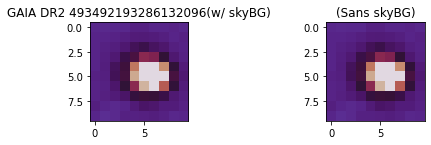

In [90]:
#Create the subsets for the images with skyBG and without skyBG.
subsetV2 = V_Master[754:764,1289:1299]
skysubsetV2 = subsetV2 - np.mean(V_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493492193286132096(w/ skyBG)')
quicklookup(subsetV2)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetV2)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetV2),'ADU')

The sum of the pixels w/o skyBG is 166319.78 ADU


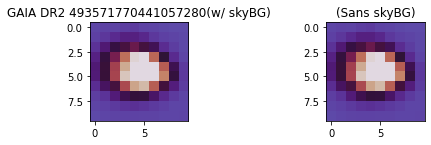

In [91]:
#Create the subsets for the images with skyBG and without skyBG.
subsetV3 = V_Master[595:605,343:353]
skysubsetV3 = subsetV3 - np.mean(V_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493571770441057280(w/ skyBG)')
quicklookup(subsetV3)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetV3)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetV3),'ADU')

### For r-channel Master image

The sum of the pixels w/o skyBG is 1036924.44 ADU


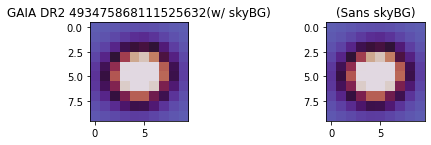

In [92]:
#Create the subsets for the images with skyBG and without skyBG.
subsetr1 = r_Master[1118:1128,1003:1013]
skysubsetr1 = subsetr1 - np.mean(r_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493475868111525632(w/ skyBG)')
quicklookup(subsetr1)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetr1)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetr1),'ADU')

The sum of the pixels w/o skyBG is 53587.42 ADU


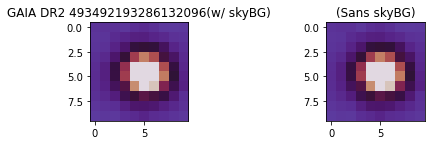

In [93]:
#Create the subsets for the images with skyBG and without skyBG.
subsetr2 = r_Master[754:764,1289:1299]
skysubsetr2 = subsetr2 - np.mean(r_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493492193286132096(w/ skyBG)')
quicklookup(subsetr2)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetr2)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetr2),'ADU')

The sum of the pixels w/o skyBG is 230114.92 ADU


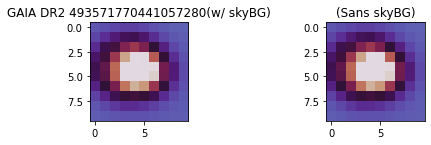

In [94]:
#Create the subsets for the images with skyBG and without skyBG.
subsetr3 = r_Master[595:605,343:353]
skysubsetr3 = subsetr3 - np.mean(r_Master_flat)

#Plot the images and print the sum of pixels.
plt.subplot(131)
plt.title('GAIA DR2 493571770441057280(w/ skyBG)')
quicklookup(subsetr3)

plt.subplot(133)
plt.title('(Sans skyBG)')
quicklookup(skysubsetr3)

print('The sum of the pixels w/o skyBG is',np.sum(skysubsetr3),'ADU')

As you can see from the before and after images, the images barely change after sky subtraction, only having negligible changes in the saturation of the colours. This mostly due to the cmap being relative rather than absolute in nature.

Also the stars seems to follow a pattern, with the first one being the brightest and the second one being the dimmest. Also, the r-channel had the highest ADUs while B-channel had the lowest ADUs.

(The summary of the aperture photometry values is displayed after the next section (Gaussian summation).)
_______________________________________________________________________________________________________________________________

#### Part 2

Now, we will sum the gaussian for each star for the master images. This will include creating a subset of each gaussian to better imitate the process above. This will make the comparison more fair.

### For B-channel

The sum of the Gaussian is 201175.44672149964


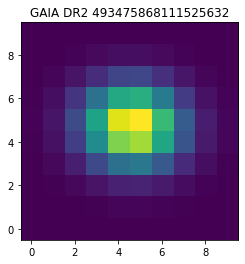

In [119]:
plt.title('GAIA DR2 493475868111525632')
plt.imshow(Z_fitB1[18:28,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitB1[18:28,18:28]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 85391.05116414557


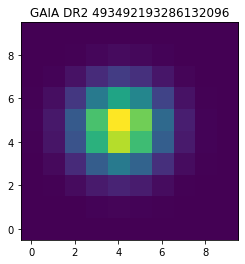

In [120]:
plt.title('GAIA DR2 493492193286132096')
plt.imshow(Z_fitB2[19:29,20:30], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitB2[19:29,20:30]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 124549.28887958961


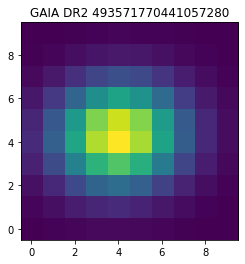

In [121]:
plt.title('GAIA DR2 493571770441057280')
plt.imshow(Z_fitB3[20:30,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitB3[20:30,18:28]) )      #Sums the values of the gaussian and prints it.

### For V-channel

The sum of the Gaussian is 850731.419239177


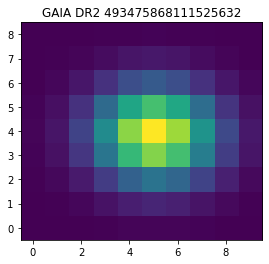

In [122]:
plt.title('GAIA DR2 493475868111525632')
plt.imshow(Z_fitV1[19:28,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitV1[19:28,18:28]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 281457.0866185303


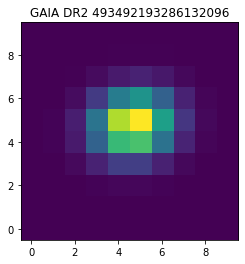

In [123]:
plt.title('GAIA DR2 493492193286132096')
plt.imshow(Z_fitV2[19:29,20:30], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitV2[19:29,20:30]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 413353.4241105883


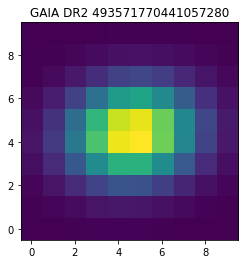

In [130]:
plt.title('GAIA DR2 493571770441057280')
plt.imshow(Z_fitV3[20:30,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitV3[20:30,18:28]) )      #Sums the values of the gaussian and prints it.

### For r-channel

The sum of the Gaussian is 1280943.200305997


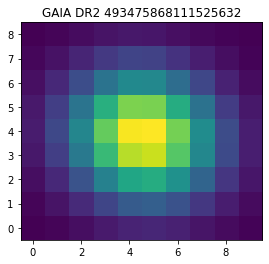

In [125]:
plt.title('GAIA DR2 493475868111525632')
plt.imshow(Z_fitr1[19:28,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitr1[19:28,18:28]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 317140.59235717735


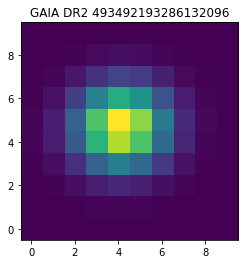

In [126]:
plt.title('GAIA DR2 493492193286132096')
plt.imshow(Z_fitr2[19:29,20:30], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitr2[19:29,20:30]) )      #Sums the values of the gaussian and prints it.

The sum of the Gaussian is 495048.87129946786


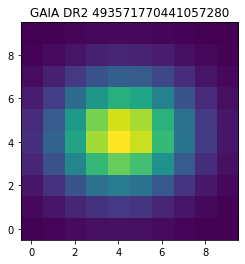

In [127]:
plt.title('GAIA DR2 493571770441057280')
plt.imshow(Z_fitr3[20:30,18:28], origin='lower')                        #Plots the subsection of the gaussian.
print ('The sum of the Gaussian is',np.sum(Z_fitr3[20:30,18:28]) )      #Sums the values of the gaussian and prints it.

#### Summary of results for the gaussian summation:


B-channel          

Star-1 = 201175.44672149964 ADU

Star-2 = 85391.05116414557 ADU

Star-3 = 124549.28887958961 ADU

__________________________________________________
V-channel

Star-1 = 850731.419239177 ADU

Star-2 = 281457.0866185303 ADU

Star-3 = 413353.4241105883 ADU

__________________________________________________
r-channel

Star-1 = 1280943.200305997 ADU

Star-2 = 317140.59235717735 ADU

Star-3 = 495048.87129946786 ADU


#### Summary of results for aperture photometry:


B-channel          

Star-1 = 130581.71 ADU

Star-2 = 8825.574 ADU

Star-3 = 47369.812 ADU

__________________________________________________
V-channel

Star-1 = 636962.2 ADU

Star-2 = 35973.21 ADU

Star-3 = 166319.78 ADU

__________________________________________________
r-channel

Star-1 = 1036924.44 ADU

Star-2 = 53587.42 ADU

Star-3 = 230114.92 ADU


The values from the Gaussian summation were always much higher than their aperture photometry values. I cannot recognize the reason for this massive difference, but as you can see from the graph below, they seems to still follow the same patterns.
(The graph from left to right, respectively plots B1,B2,B3,V1,V2,V3,r1,r2,r3)

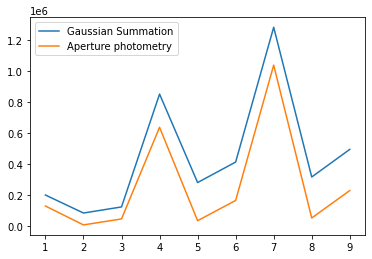

In [156]:
x = np.linspace(1,9,9)
y1 = np.array([201175.44672149964, 85391.05116414557, 124549.28887958961, 850731.419239177, 281457.0866185303, 413353.4241105883, 1280943.200305997, 317140.59235717735, 495048.87129946786])
y2 = np.array([130581.71, 8825.574, 47369.812, 636962.2, 35973.21, 166319.78, 1036924.44, 53587.42, 230114.92])

plt.plot(x,y1,'-',label='Gaussian Summation')
plt.plot(x,y2,'-',label='Aperture photometry')
plt.legend()

_____________________________________________________________________________________________________________________________

#### Part 3

Now, we will try to see the ratio of the signal to the noise of the sky background.

The combined noise of the sky background is the combination of the square root of mean pixel count (square-root of 100) and the sky background ADU.

In [189]:
############################################ For channel-B #####################################################################
CombNoiseB = np.sqrt((np.sqrt(100))**2 + (np.mean(B_Master_flat))**2)

SigRatioB1 = np.sum(skysubsetB1)/CombNoiseB

SigRatioB2 = np.sum(skysubsetB2)/CombNoiseB

SigRatioB3 = np.sum(skysubsetB3)/CombNoiseB

############################################ For channel-V #####################################################################
CombNoiseV = np.sqrt((np.sqrt(100))**2 + (np.mean(V_Master_flat))**2)

SigRatioV1 = np.sum(skysubsetV1)/CombNoiseV

SigRatioV2 = np.sum(skysubsetV2)/CombNoiseV

SigRatioV3 = np.sum(skysubsetV3)/CombNoiseV

############################################ For channel-r ######################################################################
CombNoiser = np.sqrt((np.sqrt(100))**2 + (np.mean(r_Master_flat))**2)

SigRatior1 = np.sum(skysubsetr1)/CombNoiser

SigRatior2 = np.sum(skysubsetr2)/CombNoiser

SigRatior3 = np.sum(skysubsetr3)/CombNoiser

########################################### Display SigRatio #################################################################

print('The Signal Ratios for the three stars in the three Master images.')
print()
print('Channel-B')
print('Star-1:',SigRatioB1)
print('Star-2:',SigRatioB2)
print('Star-3:',SigRatioB3)
print()
print('Channel-V')
print('Star-1:',SigRatioV1)
print('Star-2:',SigRatioV2)
print('Star-3:',SigRatioV3)
print()
print('Channel-r')
print('Star-1:',SigRatior1)
print('Star-2:',SigRatior2)
print('Star-3:',SigRatior3)



The Signal Ratios for the three stars in the three Master images.

Channel-B
Star-1: 169.28319168115357
Star-2: 11.441275822186027
Star-3: 61.40915899911801

Channel-V
Star-1: 255.89267847363595
Star-2: 14.451848917788345
Star-3: 66.81717555990986

Channel-r
Star-1: 386.70572563610665
Star-2: 19.984641225258084
Star-3: 85.81797730402883


The signal-ratios seems to follow the pattern of the brightness of the star. Star-1 has the highest brightness and thus also has the highest signal ratio. Star 2 is the dimmest and thus has the lowest signal-ratio.

Also, Channel-r seems to have higher signal-ratios for each star, which may suggest that the stars have a higher intensity in those wavelengths. As the wavelength decreases, the signal ratio also decreases, further confirming that these stars are radiating peak-intensity at a wavelengths around red or higher.

________________________________________________________________________________________________________________________________

Now I am going to compare these stars to their magnitudes in SIMBAD.

Although I was going to compare the three stars based on their magnitudes from SIMBAD, I couldn't find star-2 and star-3 in SIMBAD, thus I have resrted to using stellarium (sigh). Also SIMBAD didn't have the r-channel magnitudes either.

star-1 Mag: 11.38

star-2 Mag: 14.19

star-3 Mag: 12.63

As I have mentioned before, the signal-ratio rankings seem to follow the magnitude rankings (keeping in mind that smaller magnitude = brighter star), with star-1 being brightest and star-2 being the dimmest.
___________________________________________________________

#### Part 5

Finally, to compare, I will plot the the signal ratio for each filter channel against magnitude.

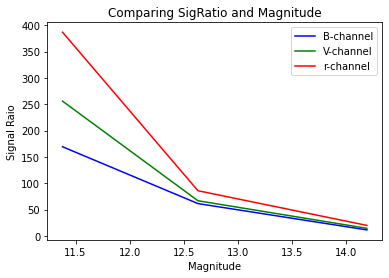

In [199]:
######Generate the arrays for the SigRatios of each channel and the magnitudes.
x = np.array([11.38, 12.63,14.19])
yB = np.array([SigRatioB1, SigRatioB3, SigRatioB2])
yV = np.array([SigRatioV1, SigRatioV3, SigRatioV2])
yr = np.array([SigRatior1, SigRatior3, SigRatior2])


#######Plot three line-graphs, one for each filter.
plt.plot(x,yB,'-b',label = 'B-channel')
plt.plot(x,yV,'-g',label = 'V-channel')
plt.plot(x,yr,'-r',label = 'r-channel')
plt.xlabel('Magnitude')
plt.ylabel('Signal Raio')
plt.title('Comparing SigRatio and Magnitude')
plt.legend()


At higher mags(lower brightness), the signal ratio is small, and so is the difference in the signal ratios between the three filters. But as lower mags(higher brightness) is approached, the signal ratios increase exponentially, with the difference in signa ratios between channels also increasing. This is due to the logarithmic nature of the magnitude of the stars.
_______________________________________________________________________________________________________________________________

# 2.5 Spectral shape

#### Part 1

First, we will load the text files of the 3 spectral filters for each of the images.

In [201]:
Bessel_B = np.loadtxt('Bessel_B-1.txt', unpack=True)
Bessel_V = np.loadtxt('Bessel_V-1.txt', unpack=True)
Sloan_r  = np.loadtxt('Sloan_r.txt', unpack=True)

#### Part 2

And now, I will define a function that given a range of wavelengths and a temperature will create a Planck
Law function (a BlackBody curve).

### Planck's Law:
$$B(	λ,T) = \frac{2hc^2}{λ^5} \frac{1}{\exp \left(\frac{h c}{λ k_b T}\right)-1}$$

In [229]:
from scipy.constants import pi
from scipy.constants import c
from scipy.constants import h

k=1.38e-23
hc2 = h*c**2*1e30                # The 10^30 is added to allow you to define lambda in microns in the blackbody function
hc_on_k  = h*c/1.38e-23*1e6      # The 10^6 is there for the same reason


def PlanckFn(wave, absTemp):
    """This function takes wavelength and absolute temperature as input to output the spectral radiance."""
    
    LN = 2 * hc2                                   #LN = Left Numerator
    LD = wave**5                                   #LD = Left Denominator
    RN = 1                                         #RN = Right Numerator
    RD = np.exp(hc_on_k/(wave*absTemp)) - 1        #RD = Right Denominator
    
    L = LN/LD
    R = RN/RD
    
    B = L*R
    
    return B

#### Part 3

 Now I will plot the three filters and the overlapping planck function of the star in question.




I looked through SIMBAD , Stellarium and other resources to find the spectral types of the star, but couldn't. So instead opted for an alternate way to approximate the temperature of the star.

I will do this by using Wien's law. From the signal ratio, I know that all three stars are stronger towards the red region of the spectrum. Thus, by using the peak of the red filter below, I can get a decent approximation of the expected photosphere temperature.

I know that this method is a gross approximation for the temperature but this is the best I can with what I have.

Text(0, 0.5, 'Intensity')

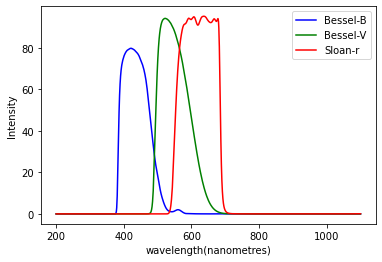

In [230]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables
xr , yr = Sloan_r

plt.plot(xB,yB,'b',label = 'Bessel-B')
plt.plot(xV,yV,'g',label = 'Bessel-V')           #Plotting the filter profiles
plt.plot(xr,yr,'r',label = 'Sloan-r')

plt.legend()
plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')

In [231]:
#Find the peak wavelength of the Sloan_r filter.
xr_max = xr[np.sum(np.where(yr == np.max(yr))) ]  

#Now use it to find the approximate temperature of photosphere.
T = 2.898/(xr_max/1000**2)      #converts nm to mm

print('The peak wavelength of Sloan_r is:', xr_max,'nm')
print('The abs temp of photosphere is:', T,'K')

The peak wavelength of Sloan_r is: 636.5 nm
The abs temp of photosphere is: 4553.024351924588 K


I still need three distinct peaks to help in further parts of this task. Thus, I will use visual comparison between our targets and other stars in their neighbourhood to tell their position on the star classification chart, keeping in mind that they are closer to the red end of the spectrum.

(I know this isn't a good method, in fact it may even be a bad method, but it helps create a set of values with reasonable pragmatism.)

For Star-1, it was similar to a K2-class star (BD+67 292) that I found in the vicinity, while it was much redder than G0(HD 23799) and bluer than a M8-class (IRC +70047 ). So I used K2 as its classification, which lends a temp of 4960 K.

For star-2, it was very similar to a K1V-class star(TYC 4327-2618-1) that I found. I compared it to a K2V-class star(HD 23189), but star-2 was a bit bluer than that one, so I stuck with the K1V-classification, giving a temp of 5170 K.

For star-3, it looks very similar to star-2, so I used a different approach. Looking at the graph comapring the SigRatios to the magnitude, it can be said that star-3 has a higher affinity towards the red-side of the spectrum as its difference between r-channel and the other two is proportionally much bigger than star-3, whuch makes me think that it is closer to being classified as a K1V class star but with a slightly lower temp of 5135 K.
___________________________



Now using the temps above, I will plot the thrre filter profiles along with the overlapping planck function of each star.

#### For star-1

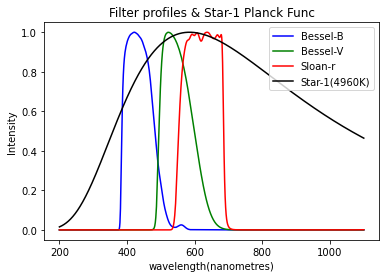

In [308]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-1 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp1 = 4960
star1 = PlanckFn(wave/1000, abstemp1)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar1 = star1/np.max(star1)           #Normalize the planck function.

plt.plot(wave,normstar1,'k-', label='Star-1(4960K)')
plt.legend(loc = 'upper right')


#### For star-2

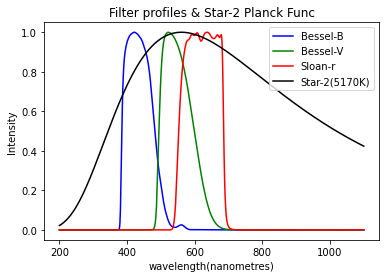

In [307]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-2 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp2 = 5170
star2 = PlanckFn(wave/1000, abstemp2)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar2 = star2/np.max(star2)           #Normalize the planck function.

plt.plot(wave,normstar2,'k-', label='Star-2(5170K)')  #plot the Planck Func

plt.legend()


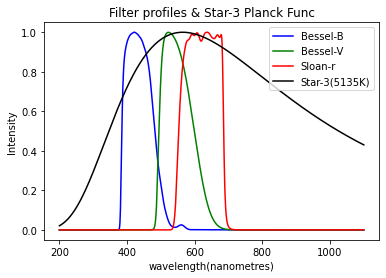

In [306]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-3 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp3 = 5135
star3 = PlanckFn(wave/1000, abstemp3)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar3 = star3/np.max(star3)           #Normalize the planck function.

plt.plot(wave,normstar3,'k-', label='Star-3(5135K)')  #plot the Planck Func

plt.legend()


_________________________________________
#### Part 4

The Peaks in the Planck graphs are between the red and the green filter peaks, which is close to the suggestion we got from the photometry counts and the S/N ratio: that the three stars are very close to the peak of the red filter. But here, the difference is that we gain more info: the peaks for star-2&3 are actually between green and red, suggesting more orange stars, while star-1 is closer to red, suggesting a redder star than the other two. Star-2 being a redder and therefore colder star makes sense as it also was the dimmest from the aperture photometry. 
__________________________________________

#### Part 5

Now I'll use the three photometric points (gaussian psf) to try and fit the blackbody temperature and observe if this matches with that expected
from the spectral type.

I will normalize the psf star counts by taking the highest value in each case and dividing all of them by it.
The respective x-values will be the peak-wavelengths for each respective channel filter. 

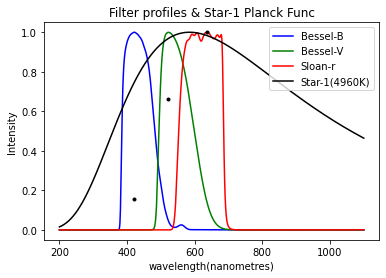

In [303]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-1 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp1 = 4960
star1 = PlanckFn(wave/1000, abstemp1)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar1 = star1/np.max(star1)           #Normalize the planck function.

plt.plot(wave,normstar1,'k-', label='Star-1(4960K)')
plt.legend(loc = 'upper right')

y_psf_1 = np.array([201175.45, 850731.42, 1280943.20])
x_psf_1 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_1 = y_psf_1/np.max(y_psf_1)
plt.plot(x_psf_1,ynorm_psf_1,'k.')


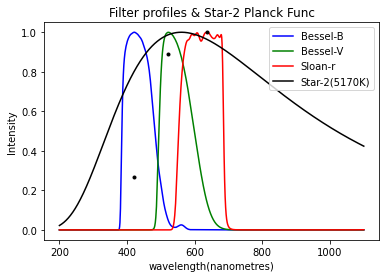

In [304]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-2 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp2 = 5170
star2 = PlanckFn(wave/1000, abstemp2)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar2 = star2/np.max(star2)           #Normalize the planck function.

plt.plot(wave,normstar2,'k-', label='Star-2(5170K)')  #plot the Planck Func

plt.legend()

y_psf_2 = np.array([85391.05, 281457.09, 317140.59])
x_psf_2 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_2 = y_psf_2/np.max(y_psf_2)
plt.plot(x_psf_2,ynorm_psf_2,'k.')

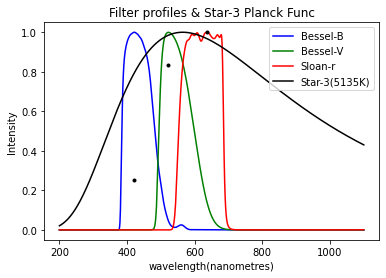

In [305]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Star-3 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp3 = 5135
star3 = PlanckFn(wave/1000, abstemp3)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar3 = star3/np.max(star3)           #Normalize the planck function.

plt.plot(wave,normstar3,'k-', label='Star-3(5135K)')  #plot the Planck Func

plt.legend()

y_psf_3 = np.array([124549.29, 413353.42, 495048.87])
x_psf_3 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_3 = y_psf_3/np.max(y_psf_3)
plt.plot(x_psf_3,ynorm_psf_3,'k.')

The graphs above suggest the following spectral classes:


Star-1: K2

Star-2: K1V

Star-3: K1V

These results are interesting because the brighter stars were shown to be lower temp, which may be because they are closer or of bigger size.
    

#### As you can see from the graphs above, the black-body function did not represent the values I got from the gaussian psf summation and thus the spectral-type I got in the end was probably wrong. Now, while I have used the previously discussed temperatures in the graphs above, I did notice that changing the absTemp would be a good way to get the black-body function to fit the psf summation values. 

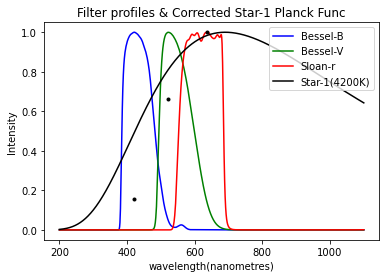

In [324]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Corrected Star-1 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp1 = 4200
star1 = PlanckFn(wave/1000, abstemp1)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar1 = star1/np.max(star1)           #Normalize the planck function.

plt.plot(wave,normstar1,'k-', label='Star-1(4200K)')
plt.legend(loc = 'upper right')

y_psf_1 = np.array([201175.45, 850731.42, 1280943.20])
x_psf_1 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_1 = y_psf_1/np.max(y_psf_1)
plt.plot(x_psf_1,ynorm_psf_1,'k.')

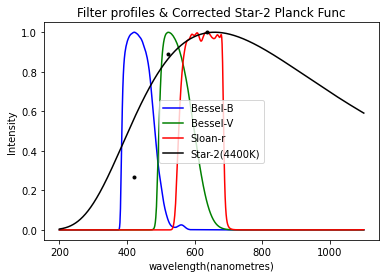

In [325]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Corrected Star-2 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp2 = 4400
star2 = PlanckFn(wave/1000, abstemp2)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar2 = star2/np.max(star2)           #Normalize the planck function.

plt.plot(wave,normstar2,'k-', label='Star-2(4400K)')  #plot the Planck Func

plt.legend()

y_psf_2 = np.array([85391.05, 281457.09, 317140.59])
x_psf_2 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_2 = y_psf_2/np.max(y_psf_2)
plt.plot(x_psf_2,ynorm_psf_2,'k.')

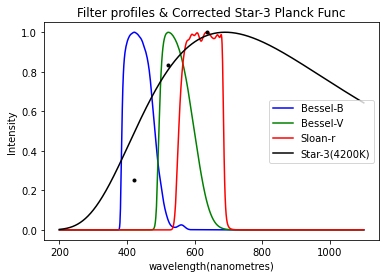

In [326]:
#####Plotting the three filters.
xB , yB = Bessel_B
xV , yV = Bessel_V                      # Unpacking the filter data into variables.
xr , yr = Sloan_r

plt.plot(xB,yB/np.max(yB),'b',label = 'Bessel-B')
plt.plot(xV,yV/np.max(yV),'g',label = 'Bessel-V')           #Plotting the normalized-filter profiles.
plt.plot(xr,yr/np.max(yr),'r',label = 'Sloan-r')            


plt.xlabel('wavelength(nanometres)')
plt.ylabel('Intensity')
plt.title('Filter profiles & Corrected Star-3 Planck Func')

######Plotting the Planck function for star-1

wave = np.linspace(200,1100,1801)
abstemp3 = 4200
star3 = PlanckFn(wave/1000, abstemp3)

#p =  np.polyfit(wave,star1,3)
#curve = np.poly1d(p)
#xp = np.linspace(200,1100,1801)
#yp = curve(xp)  

normstar3 = star3/np.max(star3)           #Normalize the planck function.

plt.plot(wave,normstar3,'k-', label='Star-3(4200K)')  #plot the Planck Func

plt.legend()

y_psf_3 = np.array([124549.29, 413353.42, 495048.87])
x_psf_3 = np.array([xB[np.sum(np.where(yB == np.max(yB))) ], xV[np.sum(np.where(yV == np.max(yV))) ], xr[np.sum(np.where(yr == np.max(yr))) ]])
ynorm_psf_3 = y_psf_3/np.max(y_psf_3)
plt.plot(x_psf_3,ynorm_psf_3,'k.')

Analyzing the translated graphs, we can see that the blackbody function is now a very good representation of the psf summation star counts. And since my original absTemp values from looking through SIMBAD were just atimations, these are also good candidates for the absTemp of the photospheres of each star. In this case, the spectral classes are: 


Star-1: K6-K7

Star-2: K5

Star-3: K6-K7

These results are interesting because the brighter stars(star-1&2) were shown to be lower temp, although you would expect them to be higher temp. This may be caused due to factors such as them being closer to us than the dimmer star, and also because they are much more massive due to being in the red-giant phase of their existence.